## <font color="orange"> Linear Regression Project: University Scores prediction </font>

In [1]:
# import requirement libraries:
import pandas as pd
import numpy as np
import pandas_profiling as pdp
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry
import pycountry_convert as pc
import plotly.graph_objects as go
import plotly.express as px
from geopy.geocoders import Nominatim
import copy
from warnings import filterwarnings
filterwarnings("ignore")
plt.style.use('_mpl-gallery')

In [2]:
# import requirement libraries for create model:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
# import dataset
data = pd.read_csv('eighteen_nineteen_university_datasets.csv', encoding='unicode_escape')
data

,World Rank,Institution,Location,National Rank,Quality of Education,Alumni Employment,Quality of Faculty,Research Output,Quality Publications,Influence,Citations,Score
0,1,Harvard University,USA,1,2,1,1,1,1,1,1,100.0
1,2,Stanford University,USA,2,10,3,2,10,4,3,2,96.7
2,3,Massachusetts Institute of Technology,USA,3,3,11,3,30,15,2,6,95.1
3,4,University of Cambridge,United Kingdom,1,5,19,6,12,8,6,19,94.0
4,5,University of Oxford,United Kingdom,2,9,25,10,9,5,7,4,93.2
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Aga Khan University,Pakistan,3,-,> 1000,-,> 1000,> 1000,464,673,69.8
996,997,University of Calcutta,India,17,353,716,296,798,966,> 1000,> 1000,69.8
997,998,K?chi University,Japan,56,-,> 1000,-,> 1000,> 1000,811,673,69.8
998,999,Soonchunhyang University,South Korea,35,-,> 1000,-,881,> 1000,> 1000,898,69.8


In [4]:
df = pd.DataFrame(data)

## <font color="orange"> 1. Cleaning Dataset </font>

In [5]:
# change name of columns
df.columns = df.columns.str.replace('\xa0', '_')
df.columns = df.columns.str.replace(' ', '_')
df.columns

# we can use following code instead of above code
# df.rename(columns={
#     'Quality\xa0of Education':'Quality Education' ,
#     'Quality\xa0of Faculty':'Quality Faculty'
#     },inplace=True)

Index(['World_Rank', 'Institution', 'Location', 'National_Rank',
       'Quality_of_Education', 'Alumni_Employment', 'Quality_of_Faculty',
       'Research_Output', 'Quality_Publications', 'Influence', 'Citations',
       'Score'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   World_Rank            1000 non-null   int64  
 1   Institution           1000 non-null   object 
 2   Location              1000 non-null   object 
 3   National_Rank         1000 non-null   int64  
 4   Quality_of_Education  1000 non-null   object 
 5   Alumni_Employment     1000 non-null   object 
 6   Quality_of_Faculty    1000 non-null   object 
 7   Research_Output       1000 non-null   object 
 8   Quality_Publications  1000 non-null   object 
 9   Influence             1000 non-null   object 
 10  Citations             1000 non-null   object 
 11  Score                 1000 non-null   float64
dtypes: float64(1), int64(2), object(9)
memory usage: 93.9+ KB


In [7]:
# check NaN values
df.isna().sum()

World_Rank              0
Institution             0
Location                0
National_Rank           0
Quality_of_Education    0
Alumni_Employment       0
Quality_of_Faculty      0
Research_Output         0
Quality_Publications    0
Influence               0
Citations               0
Score                   0
dtype: int64

Here we can see that we don't have NaN values, but above I saw "-" values that we are checking those columns

In [8]:
df1 = copy.deepcopy(df)
# replace the values equal to > 1000 by 1001
df1.replace('> 1000', 1001, inplace=True)
# replace the values equal to - by np.NaN 
df1.replace('-', np.nan, inplace=True)
df1

,World_Rank,Institution,Location,National_Rank,Quality_of_Education,Alumni_Employment,Quality_of_Faculty,Research_Output,Quality_Publications,Influence,Citations,Score
0,1,Harvard University,USA,1,2,1,1,1,1,1,1,100.0
1,2,Stanford University,USA,2,10,3,2,10,4,3,2,96.7
2,3,Massachusetts Institute of Technology,USA,3,3,11,3,30,15,2,6,95.1
3,4,University of Cambridge,United Kingdom,1,5,19,6,12,8,6,19,94.0
4,5,University of Oxford,United Kingdom,2,9,25,10,9,5,7,4,93.2
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Aga Khan University,Pakistan,3,NaN,1001,NaN,1001,1001,464,673,69.8
996,997,University of Calcutta,India,17,353,716,296,798,966,1001,1001,69.8
997,998,K?chi University,Japan,56,NaN,1001,NaN,1001,1001,811,673,69.8
998,999,Soonchunhyang University,South Korea,35,NaN,1001,NaN,881,1001,1001,898,69.8


In [9]:
# check NaN values
df1.isna().sum()

World_Rank                0
Institution               0
Location                  0
National_Rank             0
Quality_of_Education    597
Alumni_Employment         0
Quality_of_Faculty      731
Research_Output           0
Quality_Publications      0
Influence                 0
Citations                 0
Score                     0
dtype: int64

Therefore, the two columns Quality_of_Education and Quality_of_Faculty have large amounts of dashes. Now let's take a closer look at these two columns

In [10]:
# closer look
QF_dash_data = df1[df1.Quality_of_Education.isna()]
print(f"Number of - value in Quality_of_Education column: {QF_dash_data.shape}")
print(f"Max Score in dataframe: {QF_dash_data.Score.max()}")
print(f"Min Score in dataframe: {QF_dash_data.Score.min()}")
print(f"Max World Rank in dataframe: {QF_dash_data.World_Rank.max()}")
print(f"Min World Rank in dataframe: {QF_dash_data.World_Rank.min()}")
QF_dash_data

Number of - value in Quality_of_Education column: (597, 12)
Max Score in dataframe: 87.7
Min Score in dataframe: 69.8
Max World Rank in dataframe: 1000
Min World Rank in dataframe: 22


,World_Rank,Institution,Location,National_Rank,Quality_of_Education,Alumni_Employment,Quality_of_Faculty,Research_Output,Quality_Publications,Influence,Citations,Score
21,22,"University of California, San Francisco",USA,17,NaN,1001,13,45,23,8,17,87.7
59,60,Seoul National University,South Korea,1,NaN,20,NaN,19,39,146,129,83.7
79,80,Emory University,USA,47,NaN,197,164,101,66,55,63,82.5
88,89,University of Texas MD Anderson Cancer Center,USA,49,NaN,1001,91,158,104,70,66,82.0
93,94,Baylor College of Medicine,USA,51,NaN,1001,141,161,118,38,53,81.8
...,...,...,...,...,...,...,...,...,...,...,...,...
994,995,University of Macau,Macau,1,NaN,512,NaN,883,816,1001,1001,69.8
995,996,Aga Khan University,Pakistan,3,NaN,1001,NaN,1001,1001,464,673,69.8
997,998,K?chi University,Japan,56,NaN,1001,NaN,1001,1001,811,673,69.8
998,999,Soonchunhyang University,South Korea,35,NaN,1001,NaN,881,1001,1001,898,69.8


In [11]:
df1_nan = df1[df1.isnull().any(axis=1)]
df1_nan.shape

(777, 12)

777 rows have at least one "-" in one of their columns

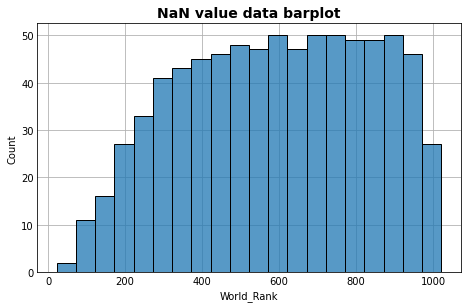

In [12]:
%matplotlib inline
sns.histplot(data=df1_nan, x='World_Rank', binwidth=50)
plt.title('NaN value data barplot', fontsize=14, fontweight='bold')
plt.show()

In [13]:
df1.dtypes

World_Rank                int64
Institution              object
Location                 object
National_Rank             int64
Quality_of_Education     object
Alumni_Employment        object
Quality_of_Faculty       object
Research_Output          object
Quality_Publications     object
Influence                object
Citations                object
Score                   float64
dtype: object

In [14]:
# convert data
convert_list =['Quality_of_Education',
              'Alumni_Employment',
              'Quality_of_Faculty',
              'Research_Output',
              'Quality_Publications',
              'Influence',
              'Citations']
df2 = copy.deepcopy(df1)
df2[convert_list] = df2[convert_list].apply(pd.to_numeric)
df2.dtypes


World_Rank                int64
Institution              object
Location                 object
National_Rank             int64
Quality_of_Education    float64
Alumni_Employment         int64
Quality_of_Faculty      float64
Research_Output           int64
Quality_Publications      int64
Influence                 int64
Citations                 int64
Score                   float64
dtype: object

<AxesSubplot:>

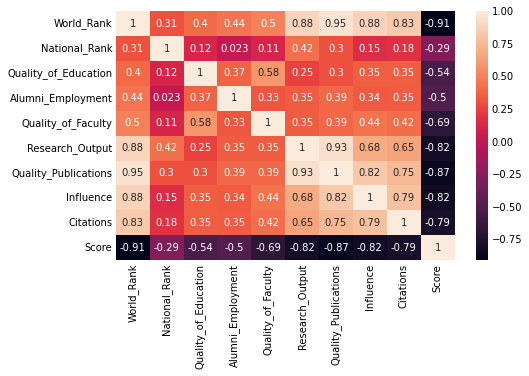

In [15]:
%matplotlib inline
sns.heatmap(df2.corr(), annot=True)

- As you can see, the number of data with '-' is high, so it is not logical to remove the rows with '-'. Also, according to the histplot, there are more '-' in universities with a higher rank, but some universities with a lower rank also have a '-' value, and it is not possible to replace the '-' value with a suitable value, because in this way, a large number of data in the form of Assumptions are introduced that negatively affect the performance of the final model. 
- Therefore, due to the lower correlation of these two columns than other columns with the desired target, we decide to remove these two columns.

In [16]:
# drop columns that have '-'(nan) values
df3 = copy.deepcopy(df2)
df3 = df3.drop(['Quality_of_Education','Quality_of_Faculty'], axis='columns')
df3

,World_Rank,Institution,Location,National_Rank,Alumni_Employment,Research_Output,Quality_Publications,Influence,Citations,Score
0,1,Harvard University,USA,1,1,1,1,1,1,100.0
1,2,Stanford University,USA,2,3,10,4,3,2,96.7
2,3,Massachusetts Institute of Technology,USA,3,11,30,15,2,6,95.1
3,4,University of Cambridge,United Kingdom,1,19,12,8,6,19,94.0
4,5,University of Oxford,United Kingdom,2,25,9,5,7,4,93.2
...,...,...,...,...,...,...,...,...,...,...
995,996,Aga Khan University,Pakistan,3,1001,1001,1001,464,673,69.8
996,997,University of Calcutta,India,17,716,798,966,1001,1001,69.8
997,998,K?chi University,Japan,56,1001,1001,1001,811,673,69.8
998,999,Soonchunhyang University,South Korea,35,1001,881,1001,1001,898,69.8


In [17]:
df3.dtypes

World_Rank                int64
Institution              object
Location                 object
National_Rank             int64
Alumni_Employment         int64
Research_Output           int64
Quality_Publications      int64
Influence                 int64
Citations                 int64
Score                   float64
dtype: object

In [18]:
# for overview our data we can run following code
# pdp.ProfileReport(df3)

In [19]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   World_Rank            1000 non-null   int64  
 1   Institution           1000 non-null   object 
 2   Location              1000 non-null   object 
 3   National_Rank         1000 non-null   int64  
 4   Alumni_Employment     1000 non-null   int64  
 5   Research_Output       1000 non-null   int64  
 6   Quality_Publications  1000 non-null   int64  
 7   Influence             1000 non-null   int64  
 8   Citations             1000 non-null   int64  
 9   Score                 1000 non-null   float64
dtypes: float64(1), int64(7), object(2)
memory usage: 78.2+ KB


In [20]:
df3.isna().sum()

World_Rank              0
Institution             0
Location                0
National_Rank           0
Alumni_Employment       0
Research_Output         0
Quality_Publications    0
Influence               0
Citations               0
Score                   0
dtype: int64

In [21]:
# check duplicated data
df3.duplicated().sum()

0

Everything is Ok. Let's continue

## <font color="orange"> 2. Preparing Dataset </font>


In [22]:
# add Longitude and Latitude columns to dataset
df3["Longitude"]=np.NaN
df3["Latitude"]=np.NaN
#use as method nominatim of geopy.geocoders
geolocator = Nominatim(user_agent="Amir")
for i in range(len(df)):
    try:
        #find location with name of location and name of uni 
        Loc = df.Location.iloc[i]+","+df.Institution.iloc[i]
        address=geolocator.geocode(Loc)
        df3["Latitude"].iloc[i]=address.latitude
        df3["Longitude"].iloc[i]=address.longitude
    
    except:
        #if not find location and uni use just from location 
        Loc= df.Location.iloc[i]
        address=geolocator.geocode(Loc)
        df3["Latitude"].iloc[i]=address.latitude
        df3["Longitude"].iloc[i]=address.longitude


>*if you recive error for above code change your dns*

In [23]:
# add new column for continent
df3['Continent']=np.NaN
for i in range(len(df3)):
    # get conuntry code
    country_code = pc.country_name_to_country_alpha2(df3.Location.iloc[i], cn_name_format="default")
    # get continent name from country code
    df3['Continent'].iloc[i] = pc.country_alpha2_to_continent_code(country_code)
df3

,World_Rank,Institution,Location,National_Rank,Alumni_Employment,Research_Output,Quality_Publications,Influence,Citations,Score,Longitude,Latitude,Continent
0,1,Harvard University,USA,1,1,1,1,1,1,100.0,-71.126782,42.367909,NA
1,2,Stanford University,USA,2,3,10,4,3,2,96.7,-122.169365,37.431314,NA
2,3,Massachusetts Institute of Technology,USA,3,11,30,15,2,6,95.1,-71.096627,42.358253,NA
3,4,University of Cambridge,United Kingdom,1,19,12,8,6,19,94.0,0.110474,52.200623,EU
4,5,University of Oxford,United Kingdom,2,25,9,5,7,4,93.2,-1.214330,51.752546,EU
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Aga Khan University,Pakistan,3,1001,1001,1001,464,673,69.8,71.247499,30.330840,AS
996,997,University of Calcutta,India,17,716,798,966,1001,1001,69.8,88.363219,22.526307,AS
997,998,K?chi University,Japan,56,1001,1001,1001,811,673,69.8,139.239418,36.574844,AS
998,999,Soonchunhyang University,South Korea,35,1001,881,1001,1001,898,69.8,126.931634,36.769988,AS


In [24]:
df3.Continent.replace ( {'NA': 'North America','SA': 'South America', 'AS': 'Asia','OC': 'Australia','AF': 'Africa',
                      'EU': 'Europe'},inplace=True)
df3

,World_Rank,Institution,Location,National_Rank,Alumni_Employment,Research_Output,Quality_Publications,Influence,Citations,Score,Longitude,Latitude,Continent
0,1,Harvard University,USA,1,1,1,1,1,1,100.0,-71.126782,42.367909,North America
1,2,Stanford University,USA,2,3,10,4,3,2,96.7,-122.169365,37.431314,North America
2,3,Massachusetts Institute of Technology,USA,3,11,30,15,2,6,95.1,-71.096627,42.358253,North America
3,4,University of Cambridge,United Kingdom,1,19,12,8,6,19,94.0,0.110474,52.200623,Europe
4,5,University of Oxford,United Kingdom,2,25,9,5,7,4,93.2,-1.214330,51.752546,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Aga Khan University,Pakistan,3,1001,1001,1001,464,673,69.8,71.247499,30.330840,Asia
996,997,University of Calcutta,India,17,716,798,966,1001,1001,69.8,88.363219,22.526307,Asia
997,998,K?chi University,Japan,56,1001,1001,1001,811,673,69.8,139.239418,36.574844,Asia
998,999,Soonchunhyang University,South Korea,35,1001,881,1001,1001,898,69.8,126.931634,36.769988,Asia


In [25]:
# Modifying the names of some countries to receive their ISO codes through the next cell
df3.Location = df3.Location.replace(
    {
        'USA':'United States',
        'Taiwan':'Taiwan, Province of China',
        'Iran':'Iran, Islamic Republic of',
        'South Korea':'Korea, Republic of',
        'Russia':'Russian Federation',
        'Slovak Republic':'Slovakia',
        'Macau':'Macao',
        'Czech Republic':'Czechia',
    })

In [26]:
# add columns for store ISO name of each country for plot:
input_countries = df3.Location
countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3

codes = [countries.get(country) for country in input_countries]
df3['Iso_loc'] = codes
df3

,World_Rank,Institution,Location,National_Rank,Alumni_Employment,Research_Output,Quality_Publications,Influence,Citations,Score,Longitude,Latitude,Continent,Iso_loc
0,1,Harvard University,United States,1,1,1,1,1,1,100.0,-71.126782,42.367909,North America,USA
1,2,Stanford University,United States,2,3,10,4,3,2,96.7,-122.169365,37.431314,North America,USA
2,3,Massachusetts Institute of Technology,United States,3,11,30,15,2,6,95.1,-71.096627,42.358253,North America,USA
3,4,University of Cambridge,United Kingdom,1,19,12,8,6,19,94.0,0.110474,52.200623,Europe,GBR
4,5,University of Oxford,United Kingdom,2,25,9,5,7,4,93.2,-1.214330,51.752546,Europe,GBR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Aga Khan University,Pakistan,3,1001,1001,1001,464,673,69.8,71.247499,30.330840,Asia,PAK
996,997,University of Calcutta,India,17,716,798,966,1001,1001,69.8,88.363219,22.526307,Asia,IND
997,998,K?chi University,Japan,56,1001,1001,1001,811,673,69.8,139.239418,36.574844,Asia,JPN
998,999,Soonchunhyang University,"Korea, Republic of",35,1001,881,1001,1001,898,69.8,126.931634,36.769988,Asia,KOR


Now check dataset again

In [27]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   World_Rank            1000 non-null   int64  
 1   Institution           1000 non-null   object 
 2   Location              1000 non-null   object 
 3   National_Rank         1000 non-null   int64  
 4   Alumni_Employment     1000 non-null   int64  
 5   Research_Output       1000 non-null   int64  
 6   Quality_Publications  1000 non-null   int64  
 7   Influence             1000 non-null   int64  
 8   Citations             1000 non-null   int64  
 9   Score                 1000 non-null   float64
 10  Longitude             1000 non-null   float64
 11  Latitude              1000 non-null   float64
 12  Continent             1000 non-null   object 
 13  Iso_loc               1000 non-null   object 
dtypes: float64(3), int64(7), object(4)
memory usage: 109.5+ KB


In [28]:
df3.isna().sum()

World_Rank              0
Institution             0
Location                0
National_Rank           0
Alumni_Employment       0
Research_Output         0
Quality_Publications    0
Influence               0
Citations               0
Score                   0
Longitude               0
Latitude                0
Continent               0
Iso_loc                 0
dtype: int64

Nice. Now the dataset is ready for EDA

## <font color="orange"> 3. Exploratory Data Analysis (EDA) </font>

First, using the histogram chart, we take a look at how the features and targets are distributed

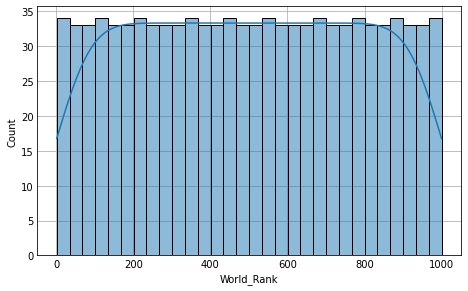

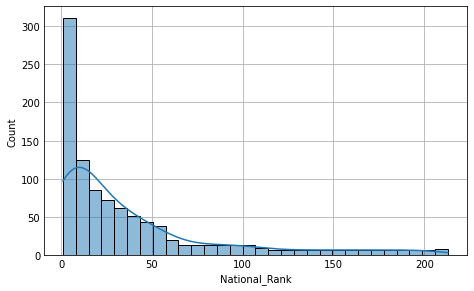

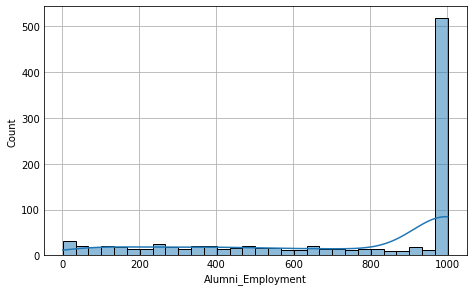

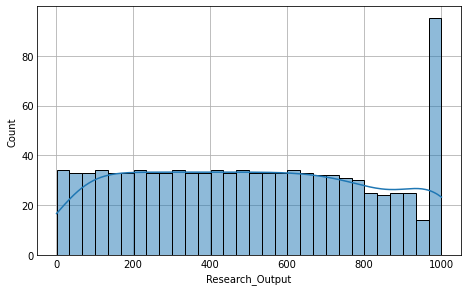

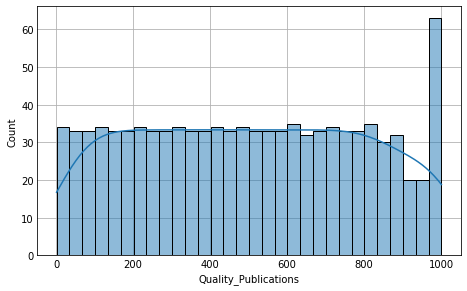

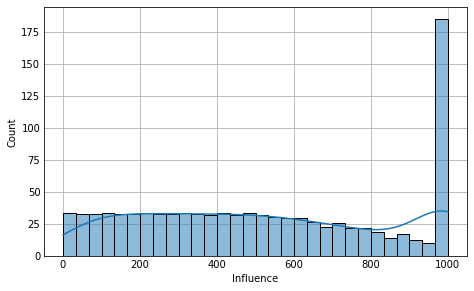

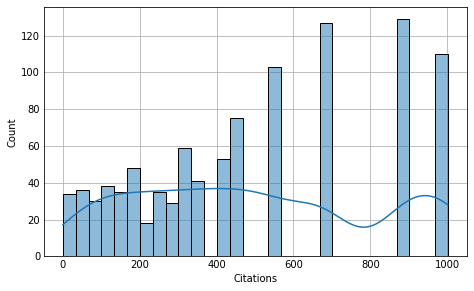

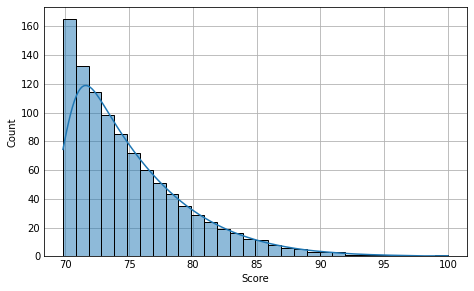

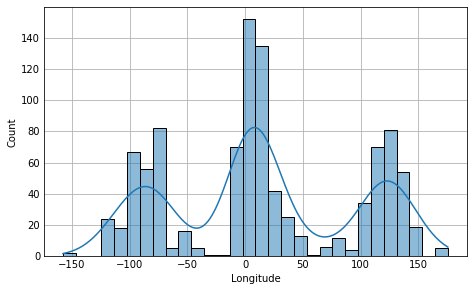

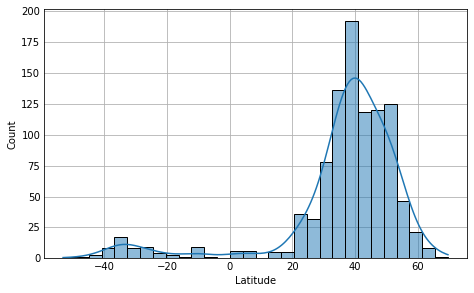

In [29]:
%matplotlib inline
for col in df3.select_dtypes(['float64', 'int64']):
    sns.histplot(df3[col], bins=30, kde=True)
    plt.show()

- As can be seen, if we do not consider the values of 1001, the World_Rank, Alumni_Employment, Research_Output, Influence and Quality_Publications are almost uniformly distributed.
- And the two feature National_Rank and Score are skewed to the left

### <font color='orange'> 3.1. Categorical Univariate Analysis </font>

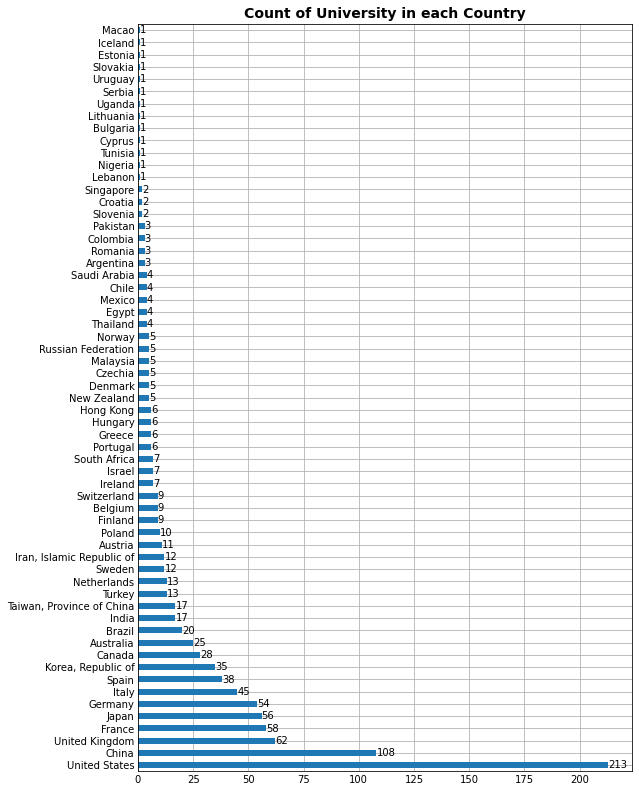

In [30]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(7,12))
df3.Location.value_counts().plot.barh(ax=ax)
plt.title('Count of University in each Country', fontsize=14, fontweight='bold')
ax.bar_label(ax.containers[0])
plt.show()

- According to the above bar plot chart, the 10 countries indicated in the chart have the largest number of universities among the top 1000 universities in the world, in which America and China have a big difference with other countries.
- Our country (Iran) is among the top 20 countries in the world in this regard

In [31]:
df3.select_dtypes(['object']).describe().T

,count,unique,top,freq
Institution,1000,1000,Harvard University,1
Location,1000,61,United States,213
Continent,1000,6,Europe,388
Iso_loc,1000,61,USA,213


According to the table, most of the universities in the ranking belong to America, but in general, most of the universities in the ranking are from the European continent.

### <font color='orange'> 3.2. Numerical Univariate Analysis </font>

In [32]:
df3.select_dtypes(['int64', 'float64']).describe().T

,count,mean,std,min,25%,50%,75%,max
World_Rank,1000.0,500.500000,288.819436,1.000000,250.750000,500.500000,750.250000,1000.000000
National_Rank,1000.0,40.023000,49.228710,1.000000,6.000000,21.000000,51.000000,213.000000
Alumni_Employment,1000.0,726.528000,343.686144,1.000000,425.750000,1001.000000,1001.000000,1001.000000
Research_Output,1000.0,508.454000,300.080433,1.000000,250.750000,500.500000,754.250000,1001.000000
Quality_Publications,1000.0,503.003000,292.854863,1.000000,250.750000,500.500000,750.250000,1001.000000
Influence,1000.0,529.156000,322.419239,1.000000,250.750000,502.500000,814.750000,1001.000000
Citations,1000.0,501.159000,308.874517,1.000000,240.000000,460.000000,673.000000,1001.000000
Score,1000.0,75.034300,4.670858,69.800000,71.500000,73.750000,77.300000,100.000000
Longitude,1000.0,15.103457,80.064822,-157.818694,-65.385507,9.091648,103.873192,175.616500
Latitude,1000.0,36.226842,19.910484,-53.136215,33.930327,39.783730,47.479252,69.681907


- As can be seen in the table above and previously also seen in the data correlation heat map, the features Research_Output, Quality_Publications, Influence and Citations are closely correlated with each other.

### <font color='orange'> 3.3. Numeric-Numeric Bivariate Analysis </font>

<AxesSubplot:>

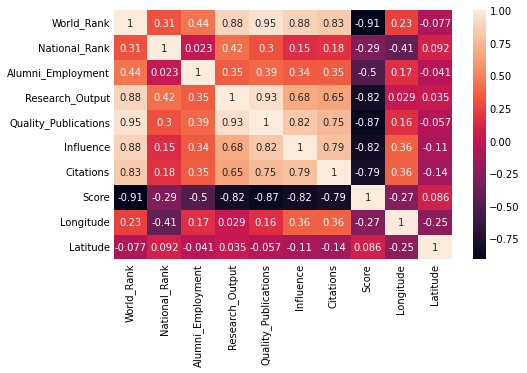

In [33]:
%matplotlib inline
sns.heatmap(df3.corr(), annot=True)

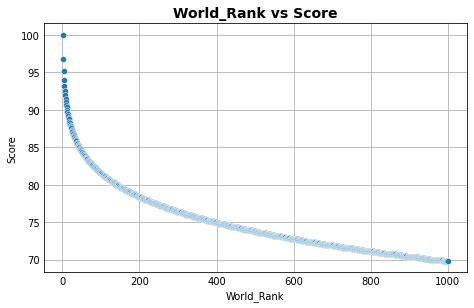

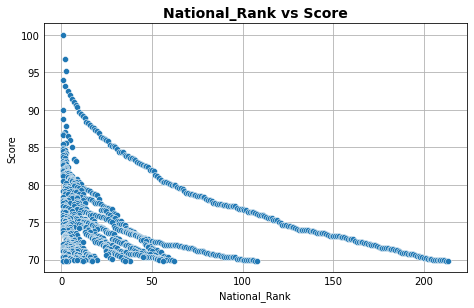

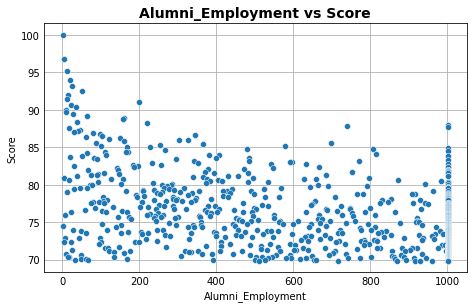

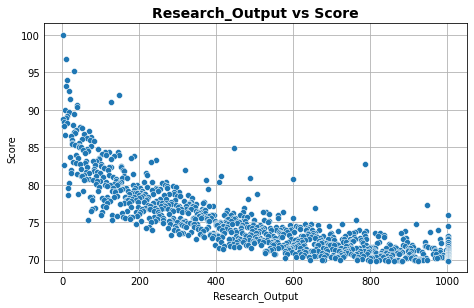

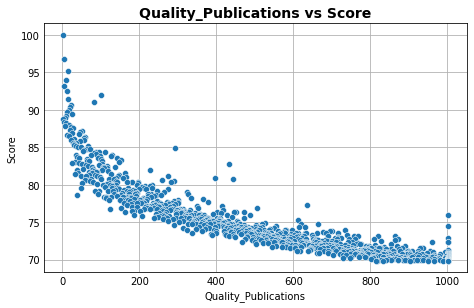

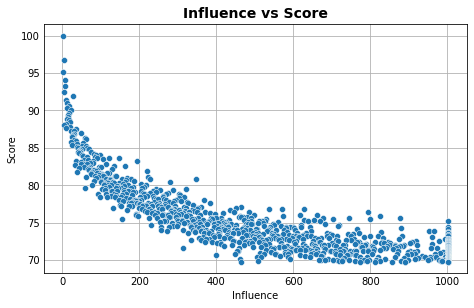

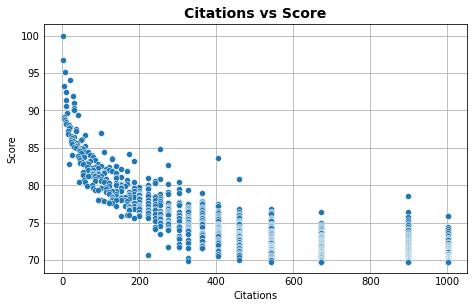

In [34]:
%matplotlib inline
for col in df3.select_dtypes(['int64']).columns:
    sns.scatterplot(data=df3, x=col, y='Score')
    plt.title(f'{col} vs Score', fontsize=14, fontweight='bold')
    plt.show()

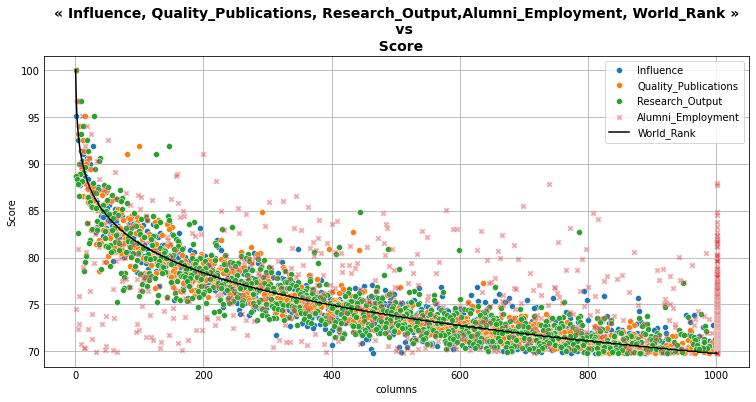

In [35]:
%matplotlib inline
selected_col = {'Influence':'o','Quality_Publications':'o','Research_Output':'o'}
plt.figure(figsize=(10,5))
for col, marker in selected_col.items():
    sns.scatterplot(data=df3, x=col, y='Score', label=f'{col}', marker=marker)
    # plt.title(f'{col} vs Score', fontsize=14, fontweight='bold')
sns.scatterplot(data=df3, x='Alumni_Employment', y='Score', label=f'Alumni_Employment', marker='X', alpha=0.4)
sns.lineplot(data=df3, x='World_Rank', y='Score', label='World_Rank', color='black')
plt.title('« Influence, Quality_Publications, Research_Output,' 
            'Alumni_Employment, World_Rank »\n                     vs                  \n  Score'
            , fontsize=14, fontweight='bold')
plt.legend()
plt.xlabel('columns')
plt.show()

- As can be seen in the scatterplot above, the trend of changes in Influence, World_Rank, Quality_Publications and Research_Outputs features are almost identical to each other and have almost the same correlation with Score, but the Alumni_Employment feature, which is shown with pale red crosses, has a large dispersion and correlation It is low with other features and score.
- As it is clear in the plot, other features increase with the decrease of Score, which is obvious because the features show the rank of universities in different fields, and therefore, if the score of a university is higher, it will lead to a lower and better rank.
- For universities with a rank of less than 200 in terms of Alumni_Employment, the score ranges from 70 to 85 on average.

### <font color='orange'> 3.4. Numeric-Categorical Bivariate Analysis </font>

for all country (methed: mean)

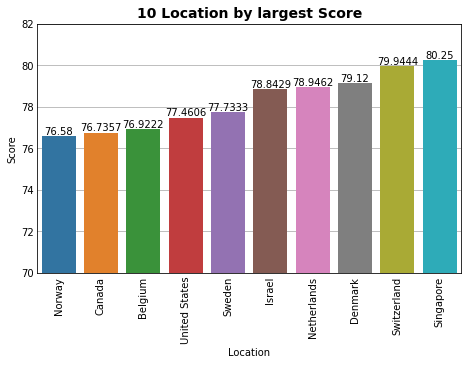

In [36]:
# 10 largest of Location vs Score for all country
a= pd.DataFrame(df3.groupby('Location')['Score'].mean().nlargest(10)).sort_values('Score')
ax = sns.barplot(data = a, y=a.Score, x=a.index)
ax.bar_label(ax.containers[0])
plt.title('10 Location by largest Score', fontsize=14, fontweight='bold')
plt.ylim(70,82)
plt.xticks(rotation=90)
plt.show()

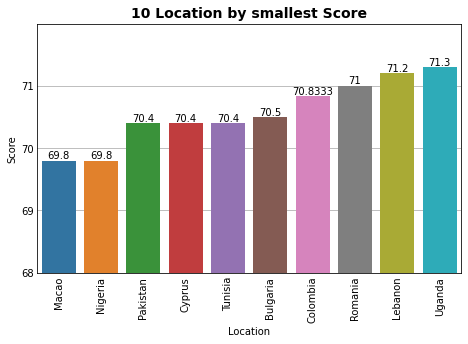

In [37]:
# 10 smallest of Location vs Score for all country
a= pd.DataFrame(df3.groupby('Location')['Score'].mean().nsmallest(10)).sort_values('Score')
ax = sns.barplot(data = a, y=a.Score, x=a.index)
ax.bar_label(ax.containers[0])
plt.title('10 Location by smallest Score', fontsize=14, fontweight='bold')
plt.ylim(68,72)
plt.xticks(rotation=90)
plt.yticks(np.arange(68,72,1))
plt.show()

- The above barplot show the first and last 10 countries ranked in terms of Score, according to which Singaporean universities are at the top of the table with an average score of 80.25, and as seen in most of the ranking criteria, Singapore was at the top and Obviously, it has the highest score.

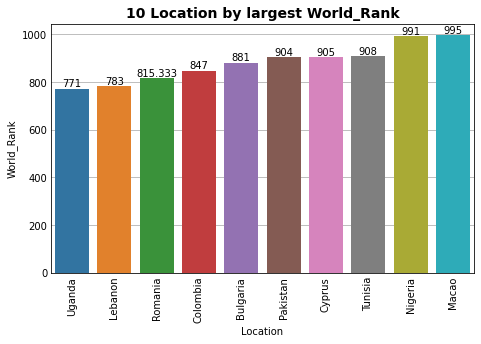

In [38]:
# 10 largest of Location vs World_Rank for all country
a= pd.DataFrame(df3.groupby('Location')['World_Rank'].mean().nlargest(10)).sort_values('World_Rank')
ax = sns.barplot(data = a, y=a.World_Rank, x=a.index)
ax.bar_label(ax.containers[0])
plt.title('10 Location by largest World_Rank', fontsize=14, fontweight='bold')
# plt.ylim(70,82)
plt.xticks(rotation=90)
plt.show()

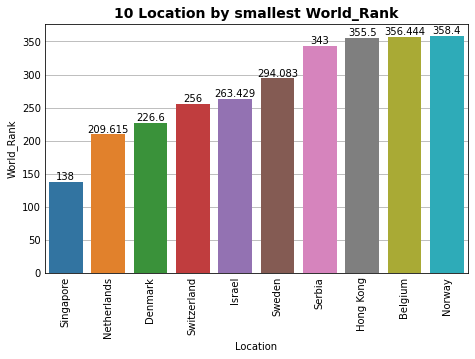

In [39]:
# 10 Smallest of Location vs World_Rank for all country
a= pd.DataFrame(df3.groupby('Location')['World_Rank'].mean().nsmallest(10)).sort_values('World_Rank')
ax = sns.barplot(data = a, y=a.World_Rank, x=a.index)
ax.bar_label(ax.containers[0])
plt.title('10 Location by smallest World_Rank', fontsize=14, fontweight='bold')
# plt.ylim(70,82)
plt.xticks(rotation=90)
plt.show()

- The above barplot show the top 10 and bottom 10 countries in terms of global rankings, with Singapore universities at the top as expected with an average global ranking of 138.

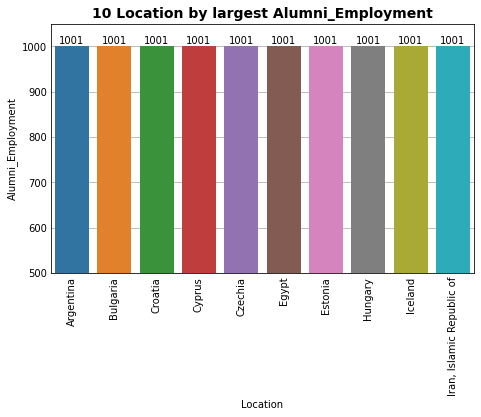

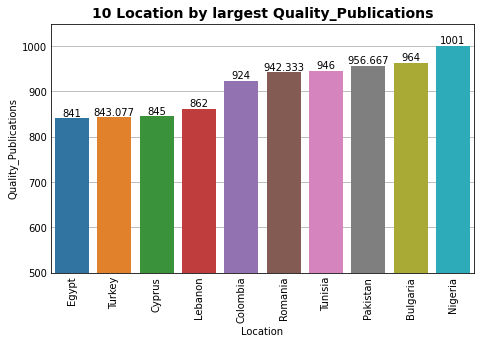

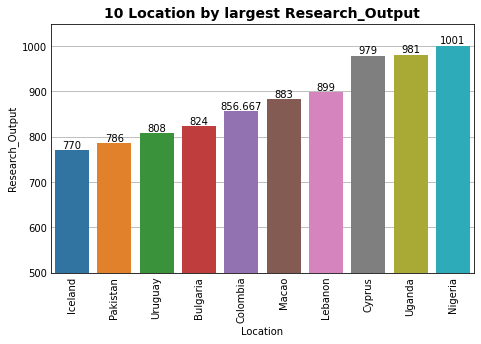

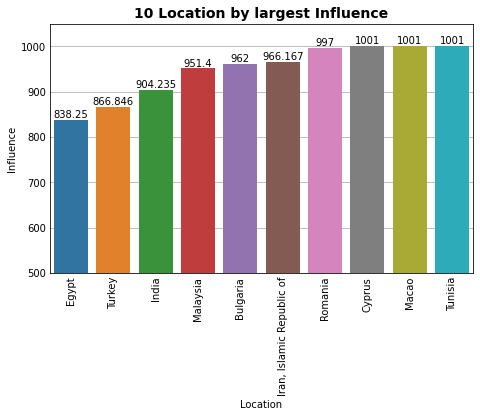

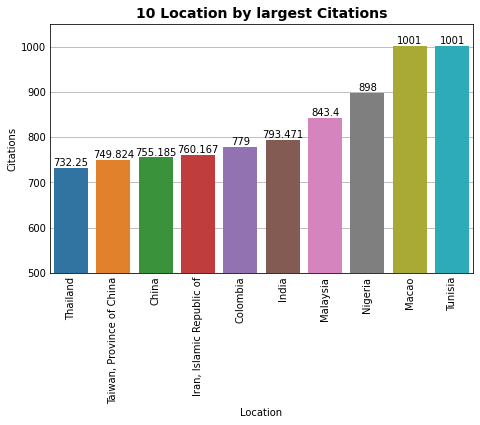

In [40]:
# 10 largest of Location vs other columns for all country

my_col = ['Alumni_Employment','Quality_Publications','Research_Output', 'Influence', 'Citations']
for col in df3[my_col].columns:
    a= pd.DataFrame(df3.groupby('Location')[col].mean().nlargest(10)).sort_values(col)
    ax = sns.barplot(data = a, y=a[col], x=a.index)
    ax.bar_label(ax.containers[0])
    plt.title(f'10 Location by largest {col}', fontsize=14, fontweight='bold')
    plt.ylim(500,1050)
    plt.xticks(rotation=90)
    plt.show()


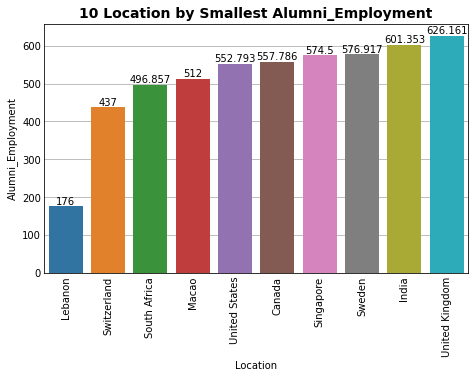

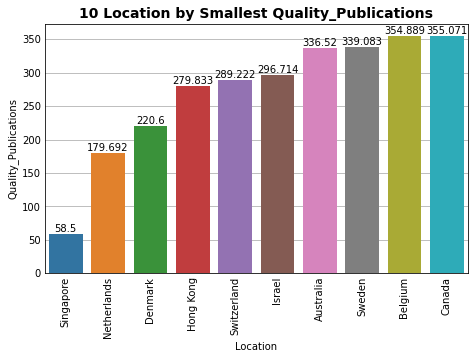

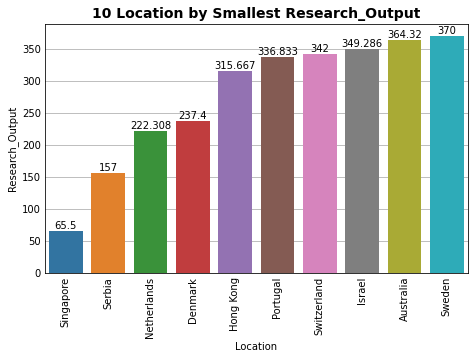

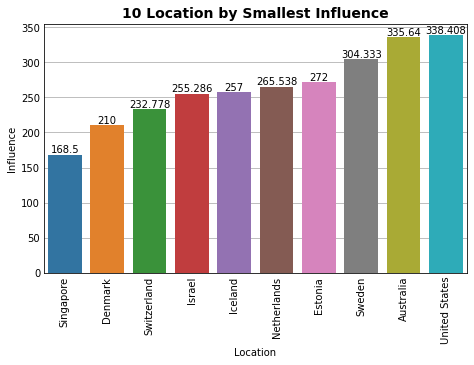

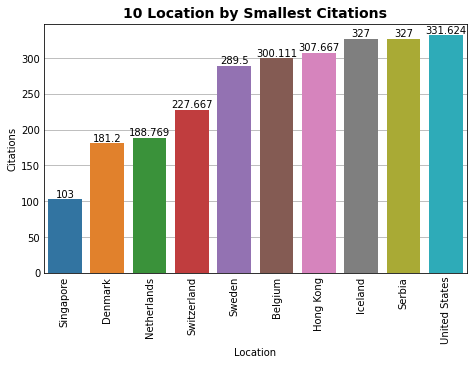

In [41]:
# 10 smallest of Location vs other columns for all country

my_col = ['Alumni_Employment','Quality_Publications','Research_Output', 'Influence', 'Citations']
for col in df3[my_col].columns:
    a= pd.DataFrame(df3.groupby('Location')[col].mean().nsmallest(10)).sort_values(col)
    ax = sns.barplot(data = a, y=a[col], x=a.index)
    ax.bar_label(ax.containers[0])
    plt.title(f'10 Location by Smallest {col}', fontsize=14, fontweight='bold')
    plt.xticks(rotation=90)
    plt.show()

- The barplot above show the first and last 10 countries ranked in terms of Citations, according to which Singaporean universities are at the top of the table with an average rank of 103.
- In the barplot above, the first and last 10 countries are shown in terms of Alumni_Empolyment. As can be seen, in this regard, Lebanese universities have better conditions than other universities.
- Unfortunately, according to the diagram, Iranian universities, like some other countries, do not have good conditions in terms of Alumni_Employment and are among the last ranks in this field.
- In the barplot above, the first and last 10 countries ranked in terms of Quality_Publication are shown, according to which Singapore is at the top with an average rank of 58.5, and Nigeria, which of course had only one university in this ranking, with a rank of more than 1000 It is at the bottom of this ranking.
- In the barplot above, the first and last 10 countries ranked in terms of Quality_Publication are shown, according to which Singapore is at the top with an average rank of 58.5, and Nigeria, which of course had only one university in this ranking, with a rank of more than 1000 It is at the bottom of this ranking.
- The above chart also shows the first and last 10 countries ranked in terms of Research_Output, according to which the universities of Singapore are at the top with an average rank of 65.5, and Nigeria is at the bottom of this table with a rank of over 1000.
- The barplot above show the first and last 10 countries ranked in terms of Influence, according to which Singaporean universities are again at the top with an average rank of 168.5.

Despite the explanations given, Singapore has only two universities in this ranking, and it might be better to analysis only on the countries that have more than 10 universities in this list, which we will discuss below:

for country by at least 10 uni (methed: mean)

In [42]:
selected_country= df3['Location'].value_counts()
selected_country = selected_country[selected_country >= 10].index
df4 = df3.copy()
df4 = df4[df4.Location.isin(selected_country)]

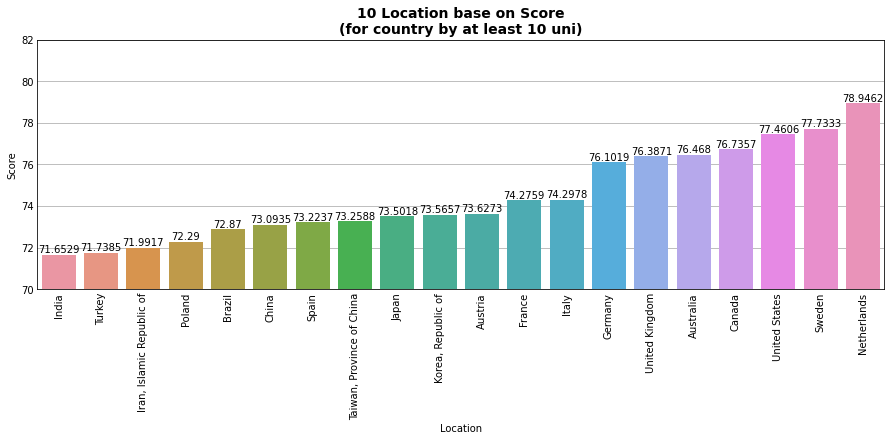

In [43]:
#Location vs Score for country by at least 10 uni
plt.figure(figsize=(12,4))
a= pd.DataFrame(df4.groupby('Location')['Score'].mean()).sort_values('Score')
ax = sns.barplot(data = a, y=a.Score, x=a.index)
ax.bar_label(ax.containers[0])
plt.title('10 Location base on Score\n(for country by at least 10 uni)', fontsize=14, fontweight='bold')
plt.ylim(70,82)
plt.xticks(rotation=90)
plt.show()

- For countries that have at least 10 universities in the ranking, the above barplot shows the average score, according to which Dutch universities are on top with an average score of 78.95, followed by Swedish and American universities, and unfortunately, Our country, along with Turkey and India, are at the bottom of this list with a score between 71 and 72.

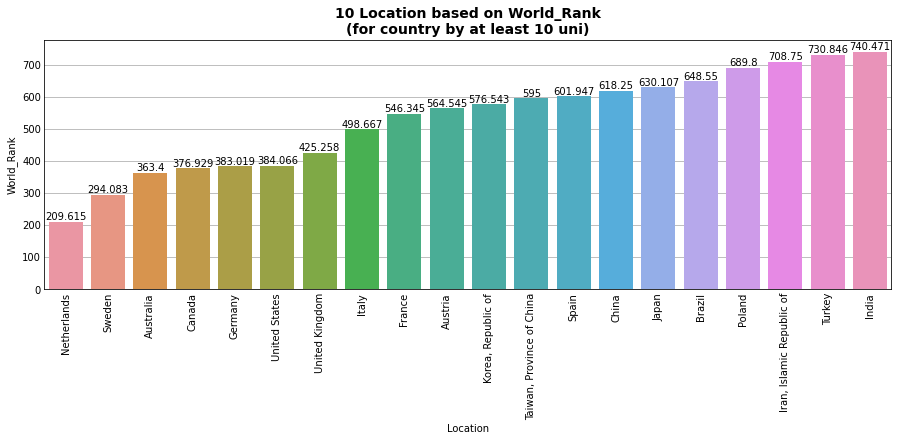

In [44]:
# Location vs World_Rank for country by at least 10 uni
plt.figure(figsize=(12,4))
a= pd.DataFrame(df4.groupby('Location')['World_Rank'].mean()).sort_values('World_Rank')
ax = sns.barplot(data = a, y=a.World_Rank, x=a.index)
ax.bar_label(ax.containers[0])
plt.title('10 Location based on World_Rank\n(for country by at least 10 uni)', fontsize=14, fontweight='bold')
# plt.ylim(70,82)
plt.xticks(rotation=90)
plt.show()

For countries that have at least 10 universities in the ranking, the above barplot shows the global ranking, the same results as the previous barplot, i.e. the Score barplot, can be deduced.

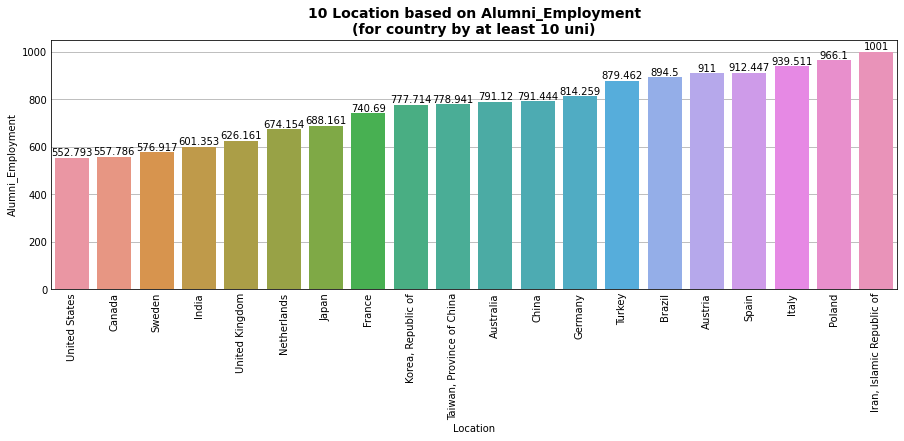

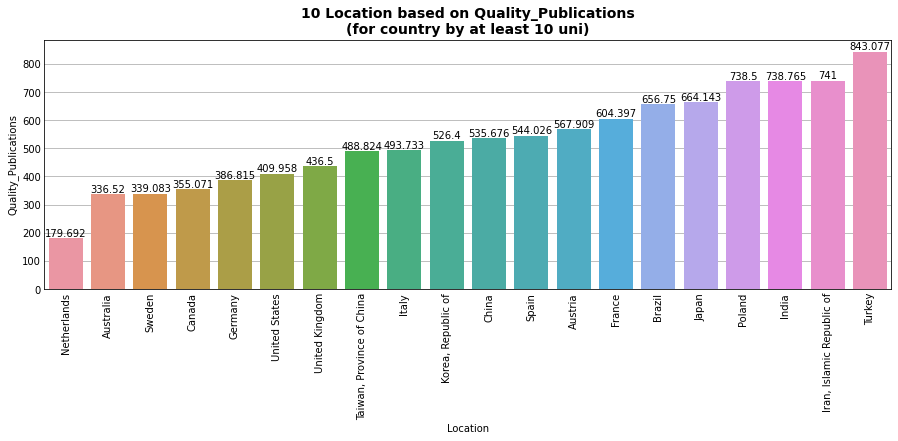

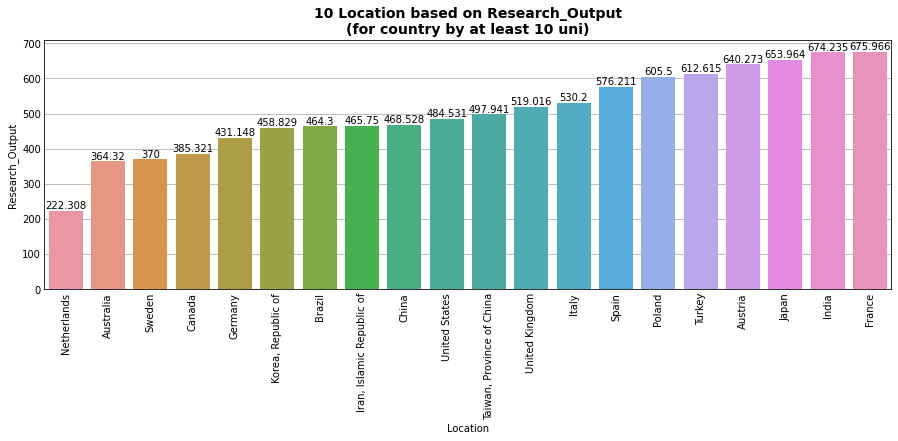

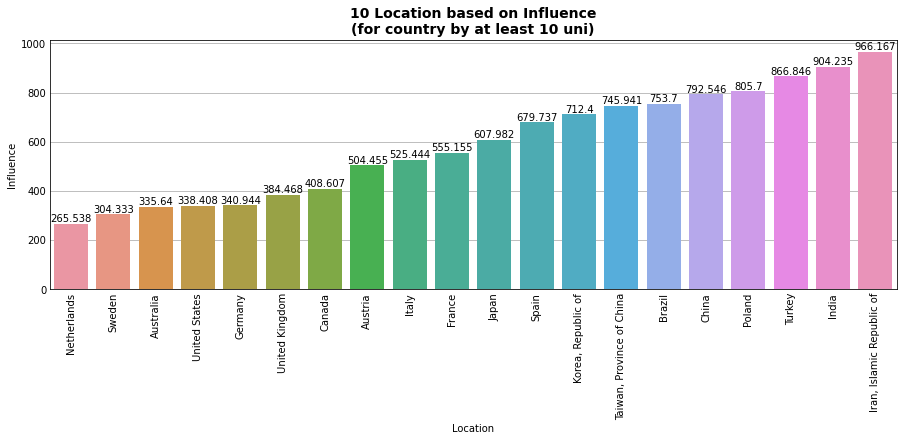

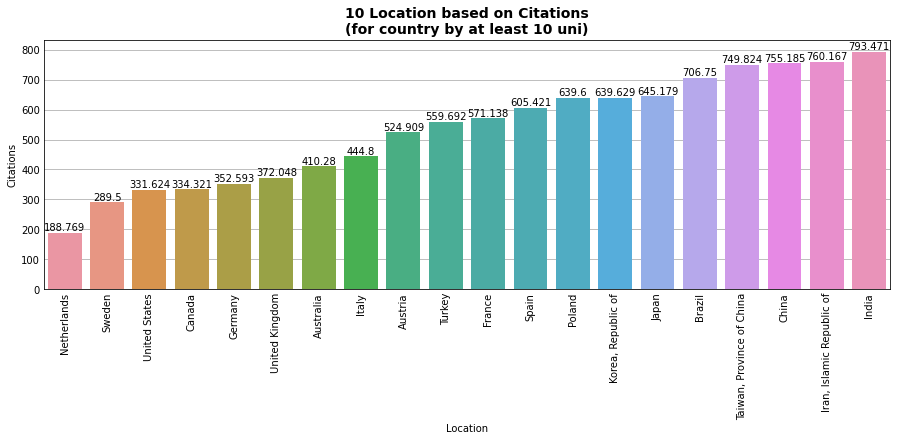

In [45]:
# Location vs other columns for country by at least 10 uni

my_col = ['Alumni_Employment','Quality_Publications','Research_Output', 'Influence', 'Citations']
for col in df4[my_col].columns:
    plt.figure(figsize=(12,4))
    a= pd.DataFrame(df4.groupby('Location')[col].mean()).sort_values(col)
    ax = sns.barplot(data = a, y=a[col], x=a.index)
    ax.bar_label(ax.containers[0])
    plt.title(f'10 Location based on {col}\n(for country by at least 10 uni)', fontsize=14, fontweight='bold')
    # plt.ylim(400,1050)
    plt.xticks(rotation=90)
    plt.show()


- For countries that have at least 10 universities in the ranking, the above barplot shows the ranking in terms of Alumni_Employment, according to which American universities are at the top with an average rank of 552, and unfortunately, our country (Iran) is at the bottom of the table with a rank of more than 1000.
- For countries that have at least 10 universities in the ranking, the above barplot shows the ranking in terms of Quality_Publications, according to which Dutch universities are at the top with an average rank of 179, and unfortunately, our country (Iran) is at the bottom of the table along with Turkey.
- For countries with at least 10 universities in the ranking, the above barplot shows the ranking in terms of Research_Output, according to which the Dutch universities are at the top with an average rank of 222, and the countries of India and France are at the bottom by a small margin.
- Fortunately, the position of Iranian universities in this criterion is relatively good
- For countries that have at least 10 universities in the ranking, the above barplot shows the ranking in terms of Influence, according to which Dutch universities are at the top with an average rank of 265, and unfortunately our country (Iran) is at the bottom of this list with an average rank of 966.
- For countries that have at least 10 universities in the ranking, the above barplot shows the ranking in terms of Citations, according to which Dutch universities are at the top with an average rank of 188, and unfortunately, our country (Iran)'s universities along with Indian universities are at the bottom of this ranking.

### <font color='orange'> 3.5. Multivariate Analysis </font>

In [46]:
df3.Location.unique()

array(['United States', 'United Kingdom', 'Japan', 'Canada',
       'Switzerland', 'France', 'Denmark', 'Israel', 'Germany', 'Sweden',
       'Australia', 'Korea, Republic of', 'Italy', 'Netherlands',
       'Norway', 'Brazil', 'Spain', 'China', 'Finland', 'Singapore',
       'Belgium', 'Taiwan, Province of China', 'Russian Federation',
       'Hong Kong', 'Austria', 'Czechia', 'Portugal', 'South Africa',
       'Ireland', 'New Zealand', 'Mexico', 'Poland', 'Argentina',
       'Greece', 'Saudi Arabia', 'Chile', 'Serbia', 'Slovenia',
       'Iran, Islamic Republic of', 'Hungary', 'India', 'Malaysia',
       'Egypt', 'Croatia', 'Thailand', 'Iceland', 'Estonia', 'Turkey',
       'Slovakia', 'Uruguay', 'Lithuania', 'Colombia', 'Uganda',
       'Lebanon', 'Pakistan', 'Romania', 'Bulgaria', 'Cyprus', 'Tunisia',
       'Nigeria', 'Macao'], dtype=object)

In [47]:
# standard deviation 
df_tot = df3.groupby(pd.Grouper(key="Location"),as_index=False).std(ddof=0)   
# .mean() , .var() , sum()  and other Statistics parameters can be use
tot_col = ["Netherlands","Turkey","Iran, Islamic Republic of",
           "Sweden","Austria","Poland","Finland","Switzerland","Belgium"]
# Separate countries with the same number of universities
df_totall = df_tot[(df_tot["Location"].isin(tot_col))]
df_totall

,Location,World_Rank,National_Rank,Alumni_Employment,Research_Output,Quality_Publications,Influence,Citations,Score,Longitude,Latitude
4,Switzerland,324.832949,2.581989,326.935264,343.573379,314.495991,304.413015,278.092311,5.225176,1.040018,0.475295
9,Sweden,213.893454,3.452053,340.976406,296.016047,278.986994,229.640419,197.814096,3.859908,2.808644,2.231381
13,Netherlands,134.171841,3.741657,298.004865,189.475545,152.323232,261.954082,161.072441,2.898704,0.753359,0.535684
18,Finland,225.963342,2.581989,292.150942,265.087593,234.294265,202.442859,217.698795,3.096753,1.608094,1.518236
20,Belgium,309.410591,2.581989,257.543955,330.842397,276.830251,290.323957,273.497286,3.917703,0.672857,0.162140
24,Austria,251.495297,3.162278,161.958468,233.322676,211.721281,245.878523,286.190164,2.799705,1.456616,0.513679
31,Poland,215.511392,2.872281,84.754292,173.775861,201.934767,230.923386,235.592105,2.147766,0.817445,0.958349
38,"Iran, Islamic Republic of",187.080698,3.452053,0.000000,198.866004,194.491645,100.871067,207.779464,1.618363,2.344001,1.949375
47,Turkey,150.026585,3.741657,192.564721,188.148280,122.954940,180.655578,172.482055,1.162582,3.162383,1.160434


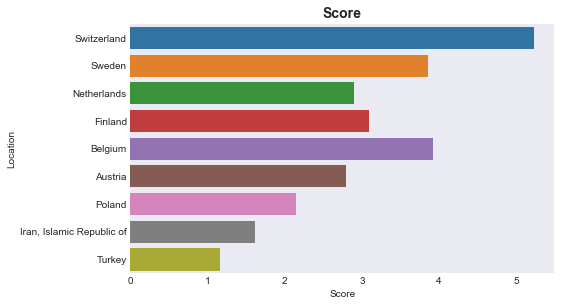

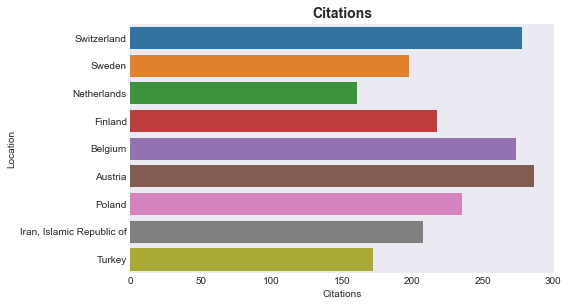

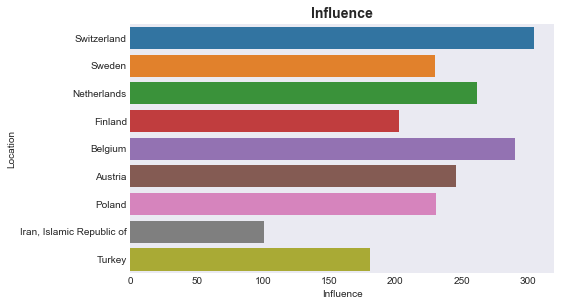

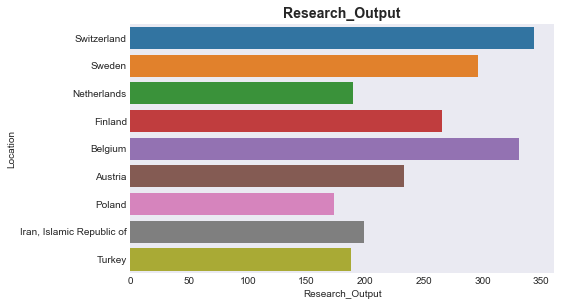

In [48]:
%matplotlib inline
columns1 = ['Score','Citations','Influence','Research_Output']
plt.style.use('seaborn-dark')
for col in columns1:
    sns.barplot(data=df_totall, x=col, y='Location')
    plt.title(col, fontsize=14, fontweight='bold')
    plt.show()
# plt.style.available

- In general, if the standard deviation number is close to zero, it means that the data are closer to the average and have less dispersion. While a large standard deviation indicates significant data dispersion.
- The above plots are drawn with the aim of checking the level of uniformity of the universities of each country. According to the above plots, universities in Turkey have less standard deviation, so this country has universities that are almost in the same rank. Also, Iranian universities are almost in the same rank. Also, Switzerland has a greater difference between its universities, or in other words, Switzerland is at the beginning and end of the ranking.

In [49]:
# compare Iran Universities in term of Citations, Alumni_Employment and Research_Output
%matplotlib inline
iran_uni = df3[df3.Location == 'Iran, Islamic Republic of']

fig = go.Figure()
fig.add_trace(go.Bar(
    y=iran_uni.Institution,
    x=iran_uni.Research_Output,
    text=iran_uni.Research_Output,
    name='Research Output',
    marker_color='indianred',
    orientation='h',

))
fig.add_trace(go.Bar(
    y=iran_uni.Institution,
    x=iran_uni.Citations,
    text=iran_uni.Citations,
    name='Citations',
    marker_color='lightsalmon',
    orientation='h',
))

fig.add_trace(go.Bar(
    y=iran_uni.Institution,
    x=iran_uni.Alumni_Employment,
    text=iran_uni.Alumni_Employment,
    name='Alumni_Employment',
    marker_color='Yellow',
    orientation='h',
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(
    barmode='group',
    width=1000,
    height=1000,
    title='Citations vs Research_Output of Iran University'
    )
fig.show()


- The plot above shows that some Iranian universities, despite having an acceptable rank in the number of researches, did not have proper references. 
- For example, Shahid Beheshti University has less points in the number of printed articles, but the number of references to those articles is more than some universities. This means more quality of the articles of this university. 
- Also, University of Tehran has published many articles, but unfortunately, it has not been able to get a good grade in referring to the article. 
- Unfortunately, despite the good ranking in Citations, all the universities of our country (Iran) are at the bottom of the ranking in terms of Alumni_Employment.
- If we want to have an overview of these two universities:

| University | Research_Output | Citations |
| ---------- | --------------- | --------- |
| Shahid Beheshti University   | 815 | 673 |
| Tehran University | 207 | 1001 |

In [50]:
# Pie Chart Universities in term of Location
fig = px.sunburst(df3,
                  path=['Location'])
fig.update_traces(textinfo="label+percent parent")
fig.update_layout(title_text="Universities in term of Location", 
                  titlefont={'size': 24, 'family':'Serif'},
                  width=750, 
                  height=750,
                 )
fig.show()

- As can be seen, the most universities in the ranking belong to the United States, China, and the United Kingdom, respectively.

In [51]:
# Pie Chart Universities in term of Continent
fig = px.sunburst(df3,
                  path=['Continent']
                 )

fig.update_traces(textinfo="label+percent parent")

fig.update_layout(title_text="Universities in term of Continent", 
                  titlefont={'size': 24, 'family':'Serif'},
                  width=750, 
                  height=750,
                 )
fig.show()

- As can be seen, the most universities in the ranking belong to the Europe, Asia, and North America, respectively.

In [52]:
# Pie Chart 50 first Universities in term of Continent, Location and Institution
fig = px.sunburst(df3[:50],
                  path=['Continent', 'Location','Institution']
                 )

fig.update_traces(textinfo="label+percent parent")

fig.update_layout(title_text="Universities in term of Continent and Location", 
                  titlefont={'size': 24, 'family':'Serif'},
                  width=750, 
                  height=750,
                 )
fig.show()

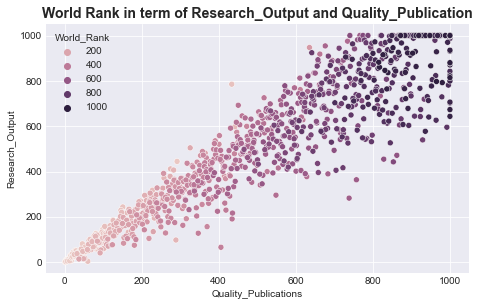

In [53]:
# draw 2d scatter plot for show Quality_Publications, Research_Output VS World_Rank
plt.style.use('_mpl-gallery')
%matplotlib inline
sns.scatterplot(data=df3, x='Quality_Publications', y='Research_Output', hue='World_Rank')
plt.title('World Rank in term of Research_Output and Quality_Publication', fontsize=14, fontweight='bold')
plt.show()

In [54]:
# draw 3d plot for show Quality_Publications, Research_Output, World_Rank vs Score
fig = px.scatter_3d(
    data_frame=df3,
    x='Quality_Publications',
    y='Research_Output',
    z='World_Rank',
    color='Score',
    template='plotly',
    opacity=0.6,
    height=700,
    title='Quality_Publications, Research_Output, World_Rank vs Score')
fig.update_traces(marker=dict(size=3))
fig.show()

==You can pan and inspect in three-dimensional space==

It can be seen that the two columns Quality Publication and Research_Output have an almost linear relationship with each other, and with the increase of one, the other also increases, and with the increase of these two features, the World Rank also increases, but the Score has an inverse relationship and decreases.

In [55]:
# Draw a map to see the location of each university on the geography map 
fig = px.scatter_mapbox(df3, lat='Latitude', lon='Longitude', hover_name='Institution',color=df3["Score"],
                        hover_data=["Continent","World_Rank", "Score"],zoom=5,
                        mapbox_style="open-street-map")
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

==You can zoom in on the map==

In [56]:
data1 = pd.DataFrame(df3[['Location','Iso_loc']].value_counts().reset_index())
data1.rename(columns={0:'Uni_num'}, inplace=True)
data1

,Location,Iso_loc,Uni_num
0,United States,USA,213
1,China,CHN,108
2,United Kingdom,GBR,62
3,France,FRA,58
4,Japan,JPN,56
...,...,...,...
56,Iceland,ISL,1
57,Estonia,EST,1
58,Cyprus,CYP,1
59,Bulgaria,BGR,1


In [57]:
data2 = pd.DataFrame(df3.groupby(['Location','Iso_loc']).mean().reset_index())
data2

,Location,Iso_loc,World_Rank,National_Rank,Alumni_Employment,Research_Output,Quality_Publications,Influence,Citations,Score,Longitude,Latitude
0,Argentina,ARG,533.333333,2.0,1001.000000,483.666667,539.333333,581.000000,558.000000,73.733333,-62.772272,-34.869995
1,Australia,AUS,363.400000,13.0,791.120000,364.320000,336.520000,335.640000,410.280000,76.468000,143.737402,-33.739349
2,Austria,AUT,564.545455,6.0,911.000000,640.272727,567.909091,504.454545,524.909091,73.627273,15.080347,47.718733
3,Belgium,BEL,356.444444,5.0,683.000000,399.444444,354.888889,368.666667,300.111111,76.922222,4.463171,50.850894
4,Brazil,BRA,648.550000,10.5,894.500000,464.300000,656.750000,753.700000,706.750000,72.870000,-48.880811,-16.755568
...,...,...,...,...,...,...,...,...,...,...,...,...
56,Turkey,TUR,730.846154,7.0,879.461538,612.615385,843.076923,866.846154,559.692308,71.738462,31.118539,39.570974
57,Uganda,UGA,771.000000,1.0,1001.000000,981.000000,779.000000,456.000000,673.000000,71.300000,32.568234,0.335151
58,United Kingdom,GBR,425.258065,31.5,626.161290,519.016129,436.500000,384.467742,372.048387,76.387097,-1.960866,53.050618
59,United States,USA,384.065728,107.0,552.793427,484.530516,409.957746,338.408451,331.624413,77.460563,-91.363817,38.549137


In [58]:
# draw map for show Number of University in each country specified by color
fig = px.choropleth(data1, locations="Iso_loc",
                    color='Uni_num', # lifeExp is a column of gapminder
                    hover_name="Location", # column to add to hover information
                    color_continuous_scale="Viridis")

fig.update_layout(
    title_text = 'Number of University in each country<br>(on map)')
fig.show()

In [59]:
# draw map for show mean of each column in each country specified by color
my_cols = ['Alumni_Employment','Quality_Publications','Research_Output',
            'Influence', 'Citations','World_Rank', 'Score']

for col in my_cols:
    fig = px.choropleth(data2, locations="Iso_loc",
                        color=col, # lifeExp is a column of gapminder
                        hover_name="Location", # column to add to hover information
                        color_continuous_scale="spectral")
    fig.update_layout(
        title_text = f'Mean {col} vs Location<br>(on map)')

    fig.show()

As can be seen in the figure:
- The North American Universities have better rank in terms of Alumni_Employment.
- The North American Universities and Australia have better rank in terms of Quality_Publicaitons.
- The North American Universities have better rank in terms of Citations.
- The North American Universities have better rank in terms of Influence.

## <font color='orange'> 4. Model </font>

In [60]:
# again see our dataset
df3

,World_Rank,Institution,Location,National_Rank,Alumni_Employment,Research_Output,Quality_Publications,Influence,Citations,Score,Longitude,Latitude,Continent,Iso_loc
0,1,Harvard University,United States,1,1,1,1,1,1,100.0,-71.126782,42.367909,North America,USA
1,2,Stanford University,United States,2,3,10,4,3,2,96.7,-122.169365,37.431314,North America,USA
2,3,Massachusetts Institute of Technology,United States,3,11,30,15,2,6,95.1,-71.096627,42.358253,North America,USA
3,4,University of Cambridge,United Kingdom,1,19,12,8,6,19,94.0,0.110474,52.200623,Europe,GBR
4,5,University of Oxford,United Kingdom,2,25,9,5,7,4,93.2,-1.214330,51.752546,Europe,GBR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Aga Khan University,Pakistan,3,1001,1001,1001,464,673,69.8,71.247499,30.330840,Asia,PAK
996,997,University of Calcutta,India,17,716,798,966,1001,1001,69.8,88.363219,22.526307,Asia,IND
997,998,K?chi University,Japan,56,1001,1001,1001,811,673,69.8,139.239418,36.574844,Asia,JPN
998,999,Soonchunhyang University,"Korea, Republic of",35,1001,881,1001,1001,898,69.8,126.931634,36.769988,Asia,KOR


For predict socre of new university we do not need following columns:
| Longitude | Latitude | Continent | Iso_loc | Location | Institution |
| --------- | -------- | --------- | ------- | -------- | ----------- |

So we drop these columns


In [61]:
df_new = copy.deepcopy(df3)
deleted_cols = ['Longitude', 'Latitude', 'Continent', 'Iso_loc', 'Location', 'Institution']
df_new = df3.drop(deleted_cols, axis=1)
df_new

,World_Rank,National_Rank,Alumni_Employment,Research_Output,Quality_Publications,Influence,Citations,Score
0,1,1,1,1,1,1,1,100.0
1,2,2,3,10,4,3,2,96.7
2,3,3,11,30,15,2,6,95.1
3,4,1,19,12,8,6,19,94.0
4,5,2,25,9,5,7,4,93.2
...,...,...,...,...,...,...,...,...
995,996,3,1001,1001,1001,464,673,69.8
996,997,17,716,798,966,1001,1001,69.8
997,998,56,1001,1001,1001,811,673,69.8
998,999,35,1001,881,1001,1001,898,69.8


In [62]:
# create ScorePred class for fit model, cross validation, plotting and testing model
%matplotlib inline

R2_train = []
R2_test = []
MAE_train = []
MAE_test = []

class ScorePred:
    def __init__(self, x, y, test_size=0.2):
        """get x, y and test_size from user
            x(Dataframe): features
            y(Dataframe_1d): target
            test_size(float): for train test split
        """
        self.x = x
        self.y = y
        self.test_size = test_size
    
    def fit_model(self):
        """
        fit model on x and y
        claculate R2, MSE and MAE for train and test
        """
        # train_test_split
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(
            self.x, self.y, test_size=self.test_size, random_state=0)
        
        # fit model
        self.model = LinearRegression()
        self.model.fit(self.x_train, self.y_train)

        # R2 Score of train set:
        self.y_train_pred = self.model.predict(self.x_train)
        self.r2_train = metrics.r2_score(self.y_train, self.y_train_pred)
        # MAE and MSE of train set:
        self.mae_train = metrics.mean_absolute_error(self.y_train, self.y_train_pred)

        # R2 Score of test set:
        self.y_test_pred = self.model.predict(self.x_test)
        self.r2_test = metrics.r2_score(self.y_test, self.y_test_pred)
        # MAE and MSE of train set:
        self.mae_test = metrics.mean_absolute_error(self.y_test, self.y_test_pred)
        self.mse_test = metrics.mean_squared_error(self.y_test, self.y_test_pred)


    def cross(self, k):
        """
        Perform cross validation
        printing result of model
        """
        # R2 mean of train set using Cross validation:
        kf = KFold(n_splits=k)
        self.cross_val = cross_val_score(self.model, self.x_train, self.y_train, cv=kf, scoring='r2')
        self.cv_mean = np.mean(self.cross_val)

        
        # Printing results
        print('='*30,'Shape','='*30)
        print("x train: ",self.x_train.shape)
        print("x test: ",self.x_test.shape)
        print("y train: ",self.y_train.shape)
        print("y test: ",self.y_test.shape)
        print('='*30,'R2_score and CV','='*30)
        print("Train R2-score :", round(self.r2_train, 4))
        print("Test R2-score :", round(self.r2_test, 4))
        print("Train MAE :", round(self.mae_train, 4))
        print("Test MAE :", round(self.mae_test, 4))
        print("Train CV scores :", self.cross_val)
        print("Train CV mean :", round(self.cv_mean, 4))

    def plot_graph(self):
        """
        plotting the result
        """
        # Plotting Graphs 
        # Residual Plot of train data
        fig, ax = plt.subplots(1,3,figsize = (15,4))
        ax[0].set_title('Residual Plot of Train samples', fontsize=14, fontweight='bold')
        sns.histplot((self.y_train-self.y_train_pred), kde=True, ax = ax[0])
        ax[0].set_xlabel('y_train - y_train_pred')
        # Y_test vs Y_test_pred scatter plot
        ax[1].set_title('y_test vs y_test_pred', fontsize=14, fontweight='bold')
        ax[1].scatter(x = self.y_test, y = self.y_test_pred)
        ax[1].set_xlabel('y_test')
        ax[1].set_ylabel('y_test_pred')
        # MAE_test vs MAE_train line plot
        ax[2].set_title('MAE test vs MAE train', fontsize=14, fontweight='bold')
        sns.lineplot(data=pd.DataFrame({'MAE_train': MAE_train, 'MAE_test': MAE_test}), markers=True)
        ax[2].set_xlabel('M')
        ax[2].set_ylabel('MAE')

        plt.show()

        # Print results of model again
        print("Train R2-score :", round(self.r2_train, 4))
        print("Test R2-score :", round(self.r2_test, 4))

    def append_result(self):
        """store R2, MAE and CV"""
        R2_train.append(round(self.r2_train, 4))
        MAE_train.append(round(self.mae_train, 4))
        R2_test.append(round(self.r2_test, 4))
        MAE_test.append(round(self.mae_test, 4))

    def show_weight(self):
        """create table of coef and intercept of model"""
        # The parameters for linear regression model
        parameter = ['b']+ ['w_' + str(i) for i in range(1,self.x.shape[1]+1)]
        columns = ['intercept'] + self.x.columns.to_list()
        weight_table = pd.DataFrame({'Parameter': parameter, 'Columns': columns})
        sk_weight = self.model.intercept_.tolist() + self.model.coef_.tolist()[0]
        weight_table = weight_table.join(pd.Series(sk_weight, name='Sk_weight'))
        return weight_table

In [63]:
# Now define first x and y
x = df_new.drop('Score', axis=1)
y = df_new.Score.values.reshape(-1,1)

In [64]:
# create model and check cross validation for kfold = 5
model1 = ScorePred(x, y, 0.2)
model1.fit_model()
model1.cross(5)

============================== Shape ==============================
x train:  (800, 7)
x test:  (200, 7)
y train:  (800, 1)
y test:  (200, 1)
============================== R2_score and CV ==============================
Train R2-score : 0.8603
Test R2-score : 0.8367
Train MAE : 1.1827
Test MAE : 1.1884
Train CV scores : [0.85888577 0.85496542 0.80220584 0.88668384 0.89542938]
Train CV mean : 0.8596


In [65]:
# Now check this for kfold = 10
model1.cross(10)

============================== Shape ==============================
x train:  (800, 7)
x test:  (200, 7)
y train:  (800, 1)
y test:  (200, 1)
============================== R2_score and CV ==============================
Train R2-score : 0.8603
Test R2-score : 0.8367
Train MAE : 1.1827
Test MAE : 1.1884
Train CV scores : [0.84432583 0.87234259 0.8584119  0.85051552 0.7721597  0.84771275
 0.88430624 0.88716863 0.89740467 0.88900423]
Train CV mean : 0.8603


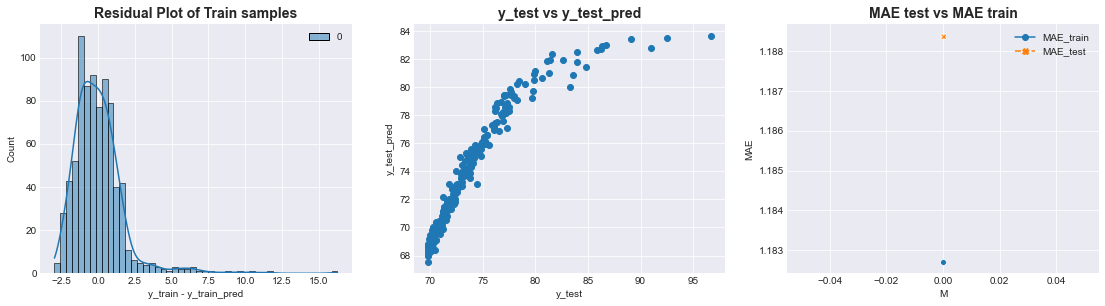

Train R2-score : 0.8603
Test R2-score : 0.8367


In [66]:
model1.append_result()
model1.plot_graph()

Our first try for create model is good but we want to improve our model. So Let's continue

## <font color='orange'> 5. Improve Model </font>

In [67]:
def improve_by_power2(x, y, test_size, dim, r2=R2_test[-1]):
    
    for col in x:
        new_col = f'{col}_2'
        x[new_col] = x[col] ** dim

        # fit model and predcit
        modeln = ScorePred(x, y, test_size)
        modeln.fit_model()     


        if modeln.r2_test <= r2:
            x.drop(new_col, axis=1, inplace=True)
        else:
            r2 = modeln.r2_test
            modeln.append_result()
            modeln.plot_graph()

            # R2_train.append(round(modeln.r2_train, 4))
            # R2_test.append(round(modeln.r2_test, 4))
            # MAE_train.append(round(modeln.mae_train, 4))
            # MAE_test.append(round(modeln.mae_test, 4))

            # plotting
            # Residual Plot of train data
            # print('\n','='*5,new_col,'='*5)
            # fig, ax = plt.subplots(1,3,figsize = (15,4))
            # ax[0].set_title('Residual Plot of Train samples', fontsize=14, fontweight='bold')
            # sns.histplot((y_train - y_train_pred), kde=True, ax = ax[0])
            # ax[0].set_xlabel('y_train - y_pred_train')
            # # Y_test vs Y_pred_test scatter plot
            # ax[1].set_title('y_test vs y_pred_test', fontsize=14, fontweight='bold')
            # ax[1].scatter(x = y_test, y = y_test_pred)
            # ax[1].set_xlabel('y_test')
            # ax[1].set_ylabel('y_pred_test')
            # # MAE_test vs MAE_train line plot
            # ax[2].set_title('MAE test vs MAE train', fontsize=14, fontweight='bold')
            # sns.lineplot(data=pd.DataFrame({'MAE_train': MAE_train, 'MAE_test': MAE_test}), markers=True)
            # ax[2].set_xlabel('M')
            # ax[2].set_ylabel('MAE')

            # plt.show()

            # # Print results of model again
            # print("Train R2-score :", round(r2_train, 4))
            # print("Test R2-score :", round(r2_test, 4))

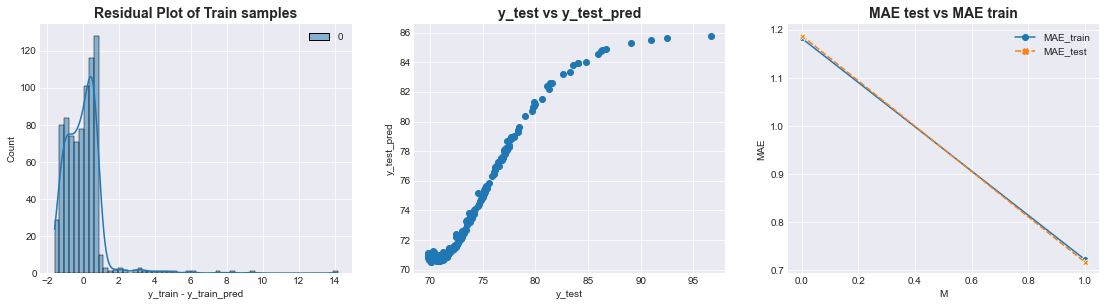

Train R2-score : 0.939
Test R2-score : 0.9249


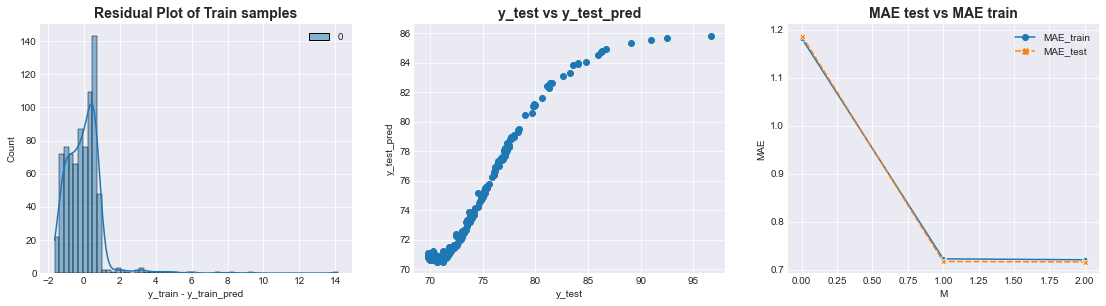

Train R2-score : 0.9392
Test R2-score : 0.9253


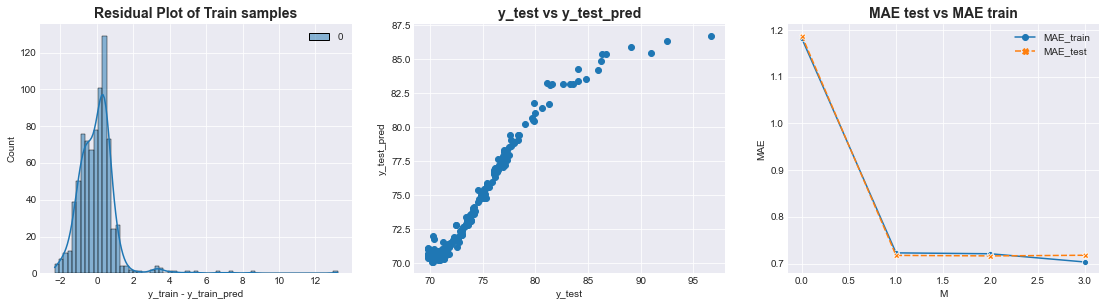

Train R2-score : 0.9446
Test R2-score : 0.9308


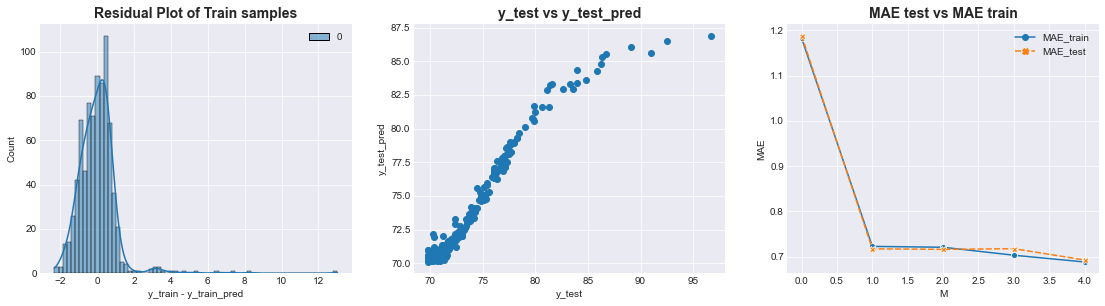

Train R2-score : 0.9468
Test R2-score : 0.9341


In [68]:
improve_by_power2(x, y, 0.2, 2, r2=R2_test[-1])

In [69]:
x

,World_Rank,National_Rank,Alumni_Employment,Research_Output,Quality_Publications,Influence,Citations,World_Rank_2,National_Rank_2,Alumni_Employment_2,Influence_2
0,1,1,1,1,1,1,1,1,1,1,1
1,2,2,3,10,4,3,2,4,4,9,9
2,3,3,11,30,15,2,6,9,9,121,4
3,4,1,19,12,8,6,19,16,1,361,36
4,5,2,25,9,5,7,4,25,4,625,49
...,...,...,...,...,...,...,...,...,...,...,...
995,996,3,1001,1001,1001,464,673,992016,9,1002001,215296
996,997,17,716,798,966,1001,1001,994009,289,512656,1002001
997,998,56,1001,1001,1001,811,673,996004,3136,1002001,657721
998,999,35,1001,881,1001,1001,898,998001,1225,1002001,1002001


In [70]:
# del last item for prevent repetition because in the 
# following code we use modeling def for fit model
# and plot more complete result for last
del R2_train[-1]
del R2_test[-1]
del MAE_train[-1]
del MAE_test[-1]

model2 = ScorePred(x, y, 0.2)
model2.fit_model()
model2.cross(5)

============================== Shape ==============================
x train:  (800, 11)
x test:  (200, 11)
y train:  (800, 1)
y test:  (200, 1)
============================== R2_score and CV ==============================
Train R2-score : 0.9468
Test R2-score : 0.9341
Train MAE : 0.6885
Test MAE : 0.693
Train CV scores : [0.95337706 0.94753153 0.9008455  0.96529302 0.96152087]
Train CV mean : 0.9457


In [71]:
model2.cross(10)

============================== Shape ==============================
x train:  (800, 11)
x test:  (200, 11)
y train:  (800, 1)
y test:  (200, 1)
============================== R2_score and CV ==============================
Train R2-score : 0.9468
Test R2-score : 0.9341
Train MAE : 0.6885
Test MAE : 0.693
Train CV scores : [0.93978817 0.96555439 0.95343016 0.94203386 0.87657781 0.94197218
 0.96681694 0.96423372 0.9626295  0.95964871]
Train CV mean : 0.9473


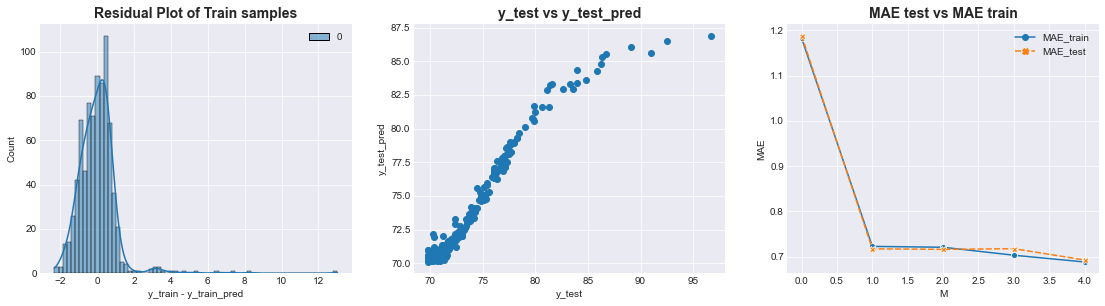

Train R2-score : 0.9468
Test R2-score : 0.9341


In [72]:
model2.append_result()
model2.plot_graph()

The accuracy of the model increased. Well, we continue to increase the accuracy even more:

In [73]:
# Now we try to use dot product the features together:
# first multiply features that have more correlation together and then other features:
x2 = copy.deepcopy(x)
x2['p_publication_world_rank'] = x2.Quality_Publications * x2.World_Rank    
x2['p_publication-world_rank2'] = x2.Quality_Publications * x2.World_Rank_2 
x2['p_publicaiton_research'] = x2.Quality_Publications * x2.Research_Output 
x2['p_publicaiton_influence'] = x2.Quality_Publications * x2.Influence      
x2['p_publication_influence2'] = x2.Quality_Publications * x2.Influence_2   
x2['p_world_rank_influence2'] = x2.World_Rank_2 * x2.Influence_2             

model3 = ScorePred(x2, y, 0.2)
model3.fit_model()
model3.cross(5)

============================== Shape ==============================
x train:  (800, 17)
x test:  (200, 17)
y train:  (800, 1)
y test:  (200, 1)
============================== R2_score and CV ==============================
Train R2-score : 0.9716
Test R2-score : 0.9642
Train MAE : 0.4658
Test MAE : 0.432
Train CV scores : [0.97347181 0.97810089 0.93507971 0.98713777 0.98132877]
Train CV mean : 0.971


In [74]:
model3.cross(10)

============================== Shape ==============================
x train:  (800, 17)
x test:  (200, 17)
y train:  (800, 1)
y test:  (200, 1)
============================== R2_score and CV ==============================
Train R2-score : 0.9716
Test R2-score : 0.9642
Train MAE : 0.4658
Test MAE : 0.432
Train CV scores : [0.96451365 0.98195741 0.98275867 0.97300794 0.91392914 0.97081217
 0.98766215 0.98688032 0.98124594 0.98170566]
Train CV mean : 0.9724


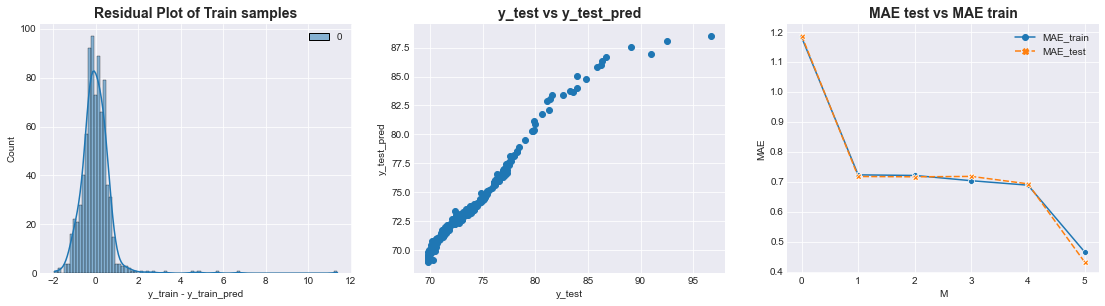

Train R2-score : 0.9716
Test R2-score : 0.9642


In [75]:
model3.append_result()
model3.plot_graph()

In [76]:
# We also try the log10 of Quality_Publications
x2['Quality_Publications'] = np.log10(x2.Quality_Publications)
x2['p_publication_world_rank'] = x2.Quality_Publications * x2.World_Rank   
x2['p_publication-world_rank2'] = x2.Quality_Publications * x2.World_Rank_2
x2['p_publicaiton_research'] = x2.Quality_Publications * x2.Research_Output
x2['p_publicaiton_influence'] = x2.Quality_Publications * x2.Influence     
x2['p_publication_influence2'] = x2.Quality_Publications * x2.Influence_2  
x2['p_world_rank_influence'] = x2.World_Rank_2 * x2.Influence_2            

model4 = ScorePred(x2, y, 0.2)
model4.fit_model()
model4.cross(5)

============================== Shape ==============================
x train:  (800, 18)
x test:  (200, 18)
y train:  (800, 1)
y test:  (200, 1)
============================== R2_score and CV ==============================
Train R2-score : 0.9902
Test R2-score : 0.9869
Train MAE : 0.2303
Test MAE : 0.2367
Train CV scores : [0.98999711 0.98061712 0.98270191 0.99547897 0.99497276]
Train CV mean : 0.9888


In [77]:
model4.cross(10)

============================== Shape ==============================
x train:  (800, 18)
x test:  (200, 18)
y train:  (800, 1)
y test:  (200, 1)
============================== R2_score and CV ==============================
Train R2-score : 0.9902
Test R2-score : 0.9869
Train MAE : 0.2303
Test MAE : 0.2367
Train CV scores : [0.98346612 0.9955635  0.98614413 0.97546968 0.97644679 0.987094
 0.99401733 0.99656818 0.99666511 0.99310076]
Train CV mean : 0.9885


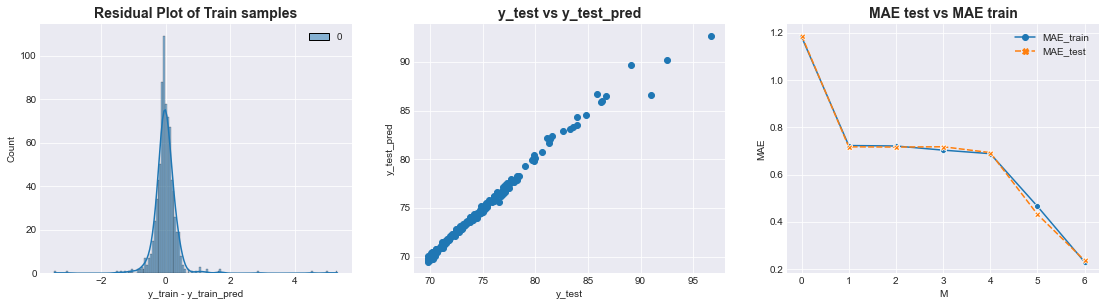

Train R2-score : 0.9902
Test R2-score : 0.9869


In [78]:
model4.append_result()
model4.plot_graph()

In [79]:
model4.show_weight()

,Parameter,Columns,Sk_weight
0,b,intercept,95.591593
1,w_1,World_Rank,-0.127431
2,w_2,National_Rank,-0.002484
3,w_3,Alumni_Employment,-0.001588
4,w_4,Research_Output,0.014871
...,...,...,...
14,w_14,p_publicaiton_research,-0.005320
15,w_15,p_publicaiton_influence,-0.002197
16,w_16,p_publication_influence2,-0.000004
17,w_17,p_world_rank_influence2,-0.000195


Now our model is ready with an accuracy of 0.9869

## <font color="orange"> 6. Visualization Final Model </font>

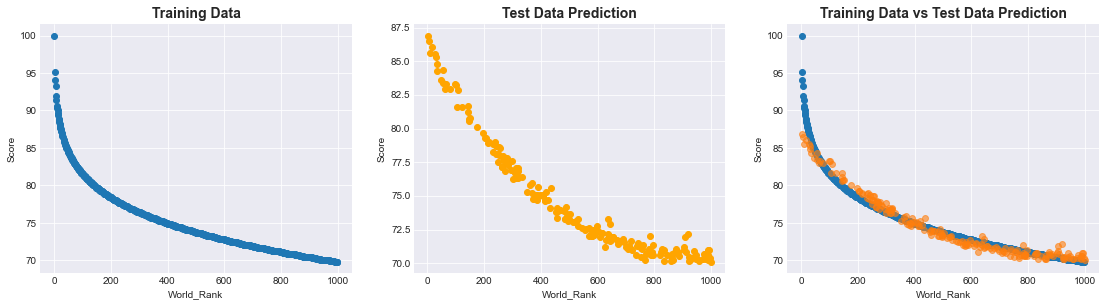

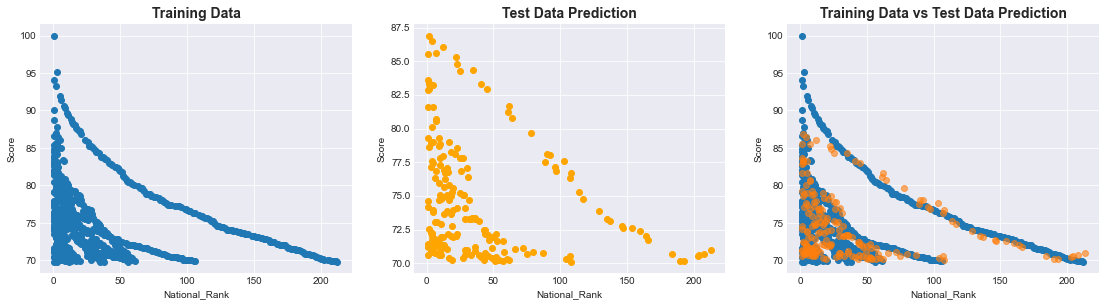

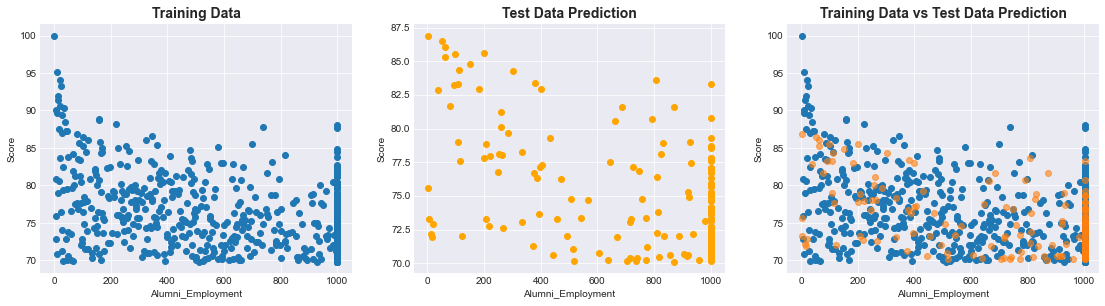

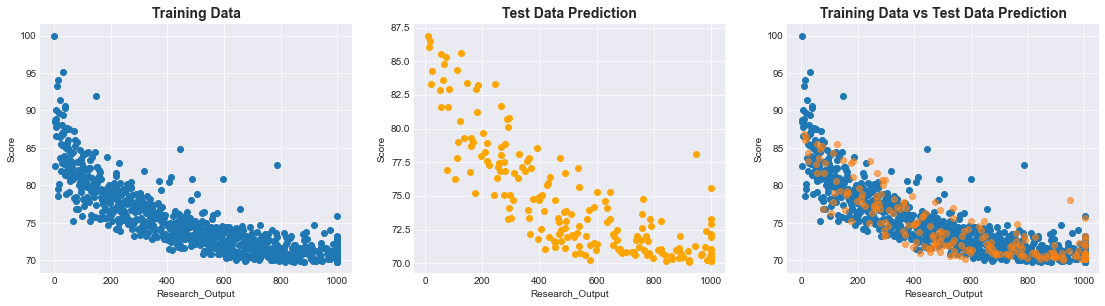

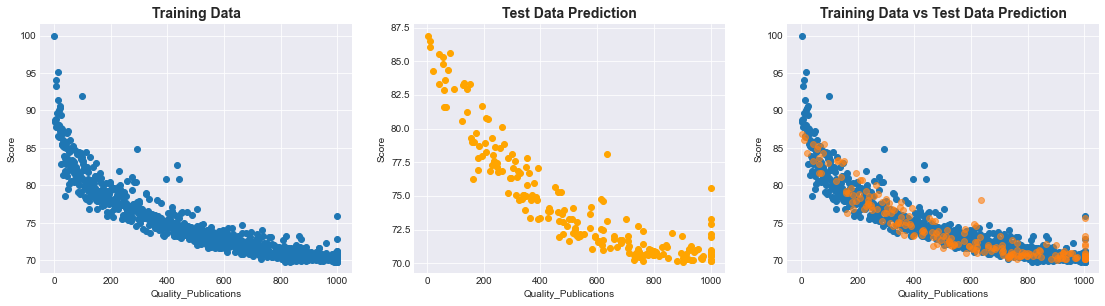

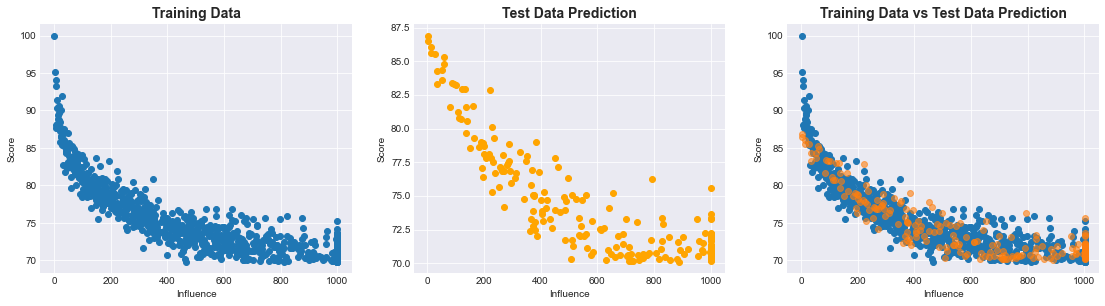

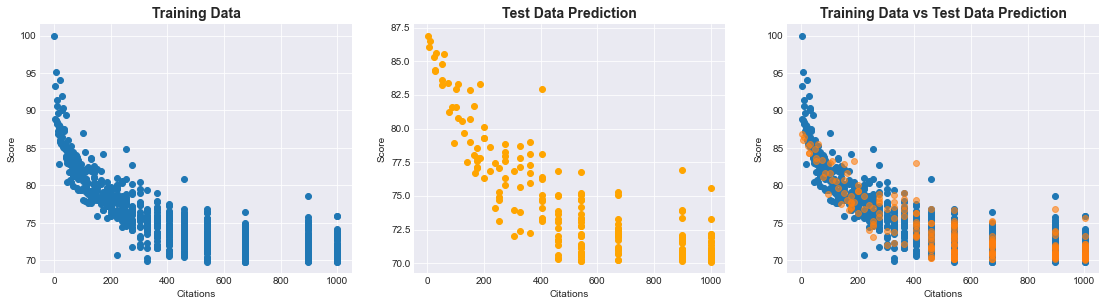

In [80]:
# Visualization the final model
# first fit model again

%matplotlib inline
model = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
model.fit(x_train, y_train)
y_test_pred = model.predict(x_test)
b = y_train
d = y_test_pred
columns = [
    'World_Rank',
    'National_Rank',
    'Alumni_Employment',
    'Research_Output',
    'Quality_Publications',
    'Influence',
    'Citations',
    ]

for col in columns:
    a = x_train[col]
    c = x_test[col]
    fig , ax = plt.subplots(1,3, figsize=(15,4))
    ax[0].scatter(a, b, label='real')
    ax[0].set_title('Training Data', fontsize=14, fontweight='bold')
    ax[0].set_xlabel(col)
    ax[0].set_ylabel('Score')
    ax[1].scatter(c, d, label='predict', color='orange')
    ax[1].set_title('Test Data Prediction', fontsize=14, fontweight='bold')
    ax[1].set_xlabel(col)
    ax[1].set_ylabel('Score')
    ax[2].scatter(a, b, label='real')
    ax[2].scatter(c, d, label='predict', alpha=.6)
    ax[2].set_title('Training Data vs Test Data Prediction', fontsize=14, fontweight='bold')
    ax[2].set_xlabel(col)
    ax[2].set_ylabel('Score')

    plt.show()

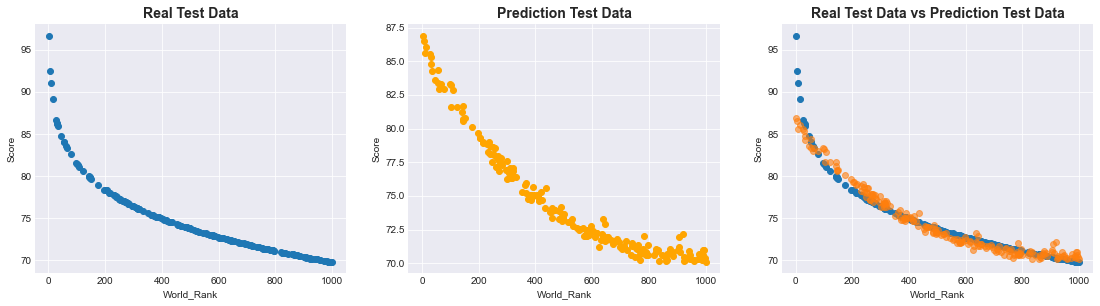

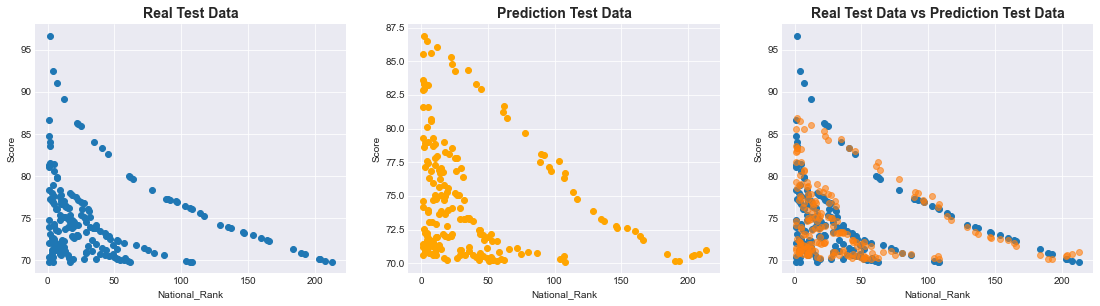

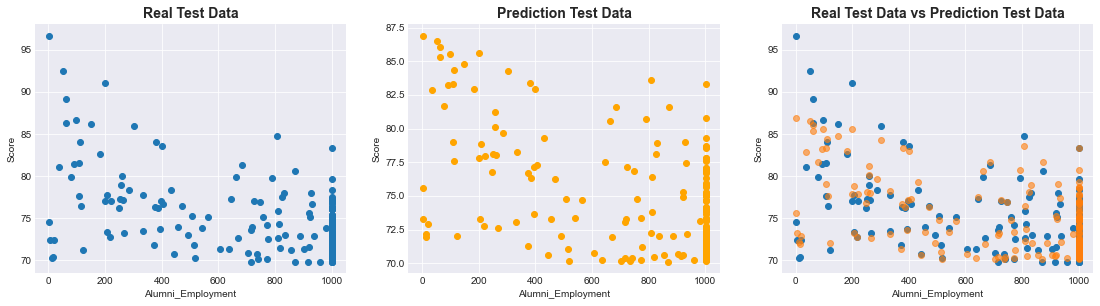

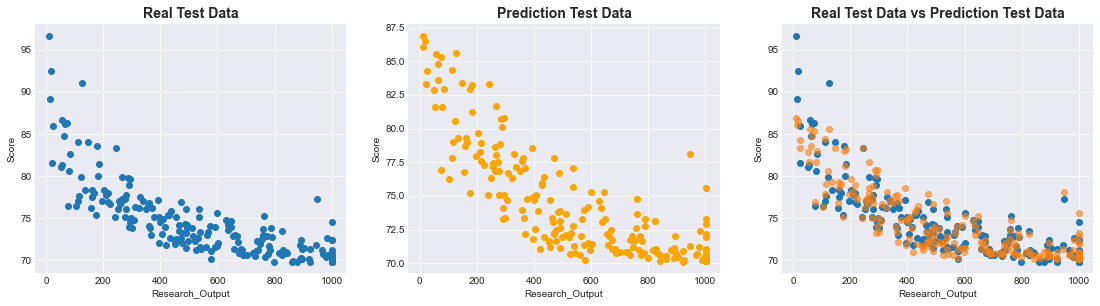

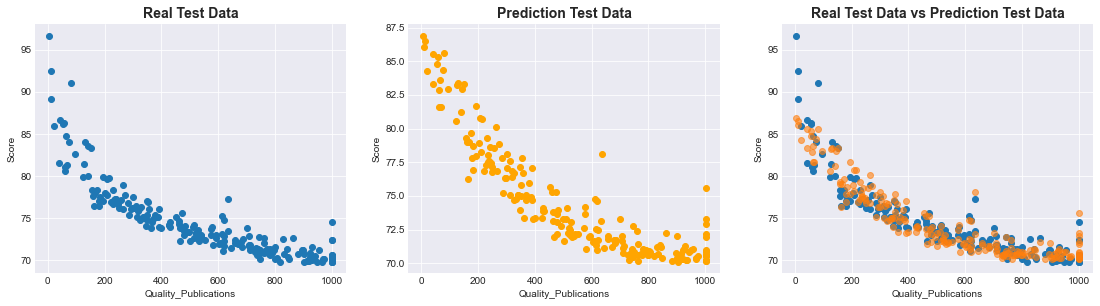

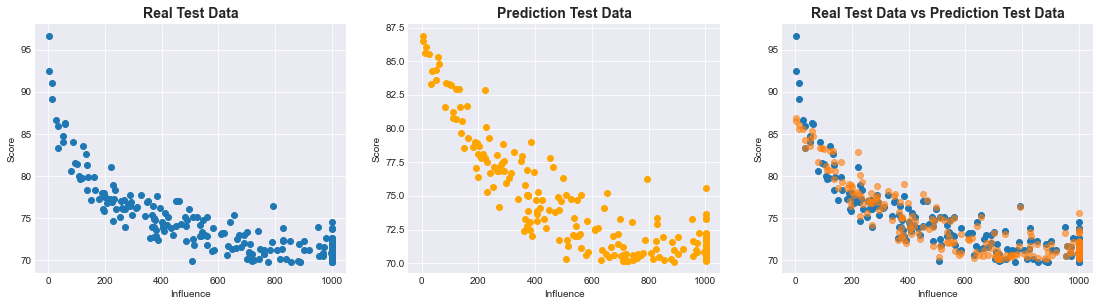

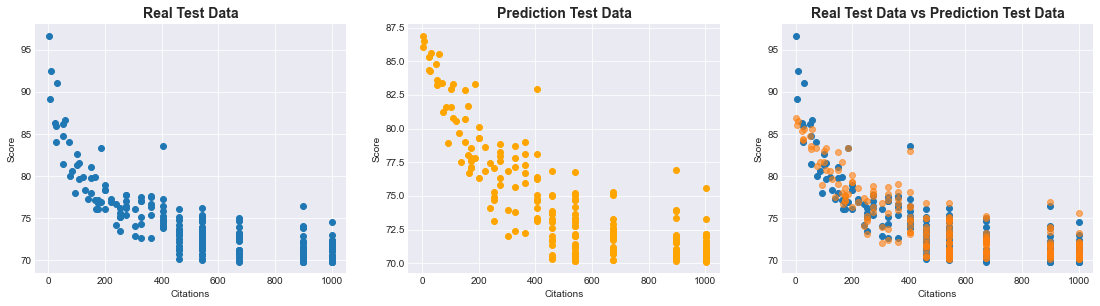

In [81]:
columns = [
    'World_Rank',
    'National_Rank',
    'Alumni_Employment',
    'Research_Output',
    'Quality_Publications',
    'Influence',
    'Citations',
    ]
b = y_test
c = y_test_pred

for col in columns:
    a = x_test[col]
    fig , ax = plt.subplots(1,3, figsize=(15,4))
    ax[0].scatter(a, b, label='real')
    ax[0].set_title('Real Test Data', fontsize=14, fontweight='bold')
    ax[0].set_xlabel(col)
    ax[0].set_ylabel('Score')
    ax[1].scatter(a, c, label='predict', color='orange')
    ax[1].set_title('Prediction Test Data', fontsize=14, fontweight='bold')
    ax[1].set_xlabel(col)
    ax[1].set_ylabel('Score')
    ax[2].scatter(a, b, label='real')
    ax[2].scatter(a, c, label='predict', alpha=.6)
    ax[2].set_title('Real Test Data vs Prediction Test Data', fontsize=14, fontweight='bold')
    ax[2].set_xlabel(col)
    ax[2].set_ylabel('Score')

    plt.show()

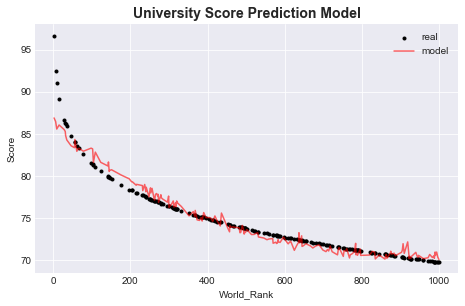

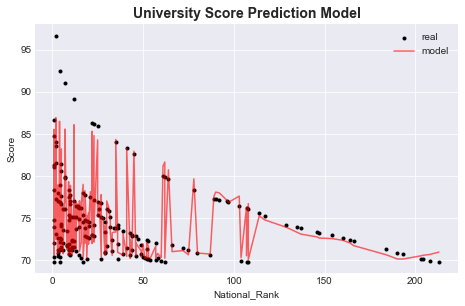

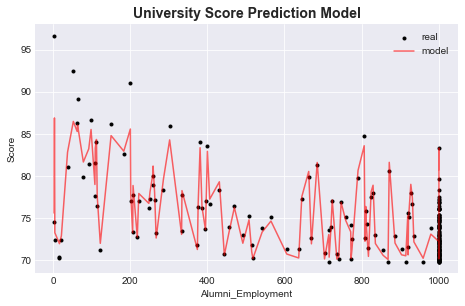

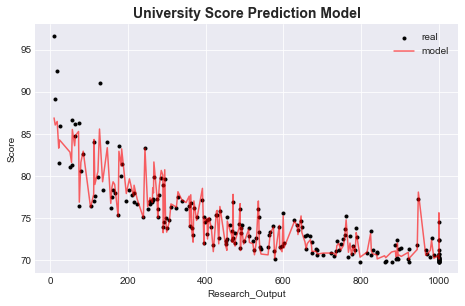

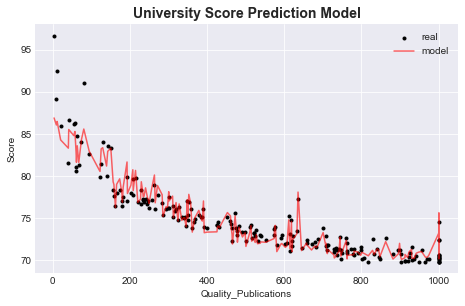

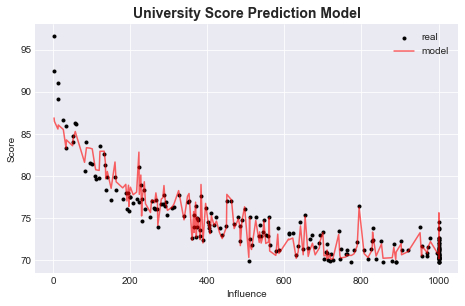

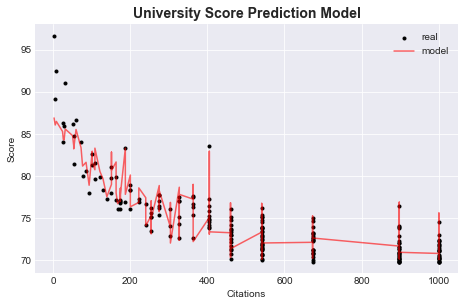

In [82]:
# compare the real data and Score prediction model
%matplotlib inline

x_test.insert(0, 'y_test', y_test)
x_test.insert(0, 'y_pred', y_test_pred)

for col in columns:
    new_df = x_test.sort_values(by=[col])
    plt.scatter(new_df[col], new_df.y_test, marker='.', color='black', label='real')
    plt.plot(new_df[col], new_df.y_pred, color='r', alpha=0.6, label='model')
    plt.title('University Score Prediction Model', fontsize=14, fontweight='bold')
    plt.xlabel(f'{col}')
    plt.ylabel('Score')
    plt.legend()
    plt.show()

Mean Absolut Error: 0.6929723614146834
Mean Squared Error: 1.3467143824485823
Root Mean Squared Error: 1.1604802378535286
R2 Score: 0.9340770742747521


Text(0, 0.5, 'R2_Score')

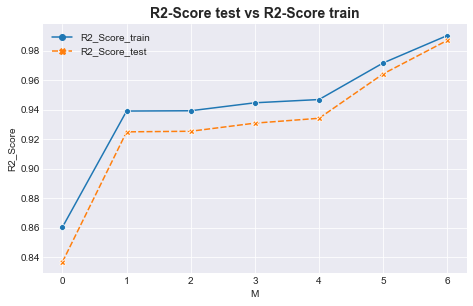

In [83]:
mae_test= metrics.mean_absolute_error(y_test, y_test_pred)
mse_test = metrics.mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = metrics.r2_score(y_test, y_test_pred)
print(f'Mean Absolut Error: {mae_test}')
print(f'Mean Squared Error: {mse_test}')
print(f'Root Mean Squared Error: {rmse_test}')
print(f'R2 Score: {r2_test}')
# R2_score_test vs R2_score_train line plot
sns.lineplot(data=pd.DataFrame({'R2_Score_train': R2_train, 'R2_Score_test': R2_test}), markers=True)
plt.title('R2-Score test vs R2-Score train', fontsize=14, fontweight='bold')
plt.xlabel('M')
plt.ylabel('R2_Score')

#### THE END

I made another version of this notebook using only def instead of class  for modeling and put it on my Kaggle account. If you like, you can also see the def version by clicking on the link below.

def Version link: 
    https://www.kaggle.com/code/arezalo/univeristy-rank-eda-linear-regression/notebook

Thanks for your attentionv :)